In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
%matplotlib inline

## Reading in the dataset

In [2]:
# read in the dataset and preview it
full_dataset=pd.read_csv("train.csv")
full_dataset.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


## Slight Exploratory Data Analysis of the data to know what we are working with Plus comments

In [3]:
# get a general feel of the data
full_dataset.info()
# note that the 'qualification' has some missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

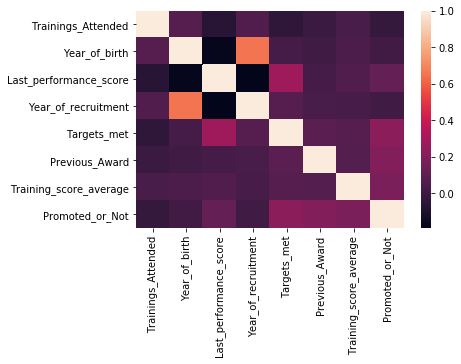

In [4]:
# visualise some featues that are highly correlated with each other, on the numerical variables
sns.heatmap(full_dataset.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027761DBF8D0>,
      dtype=object)

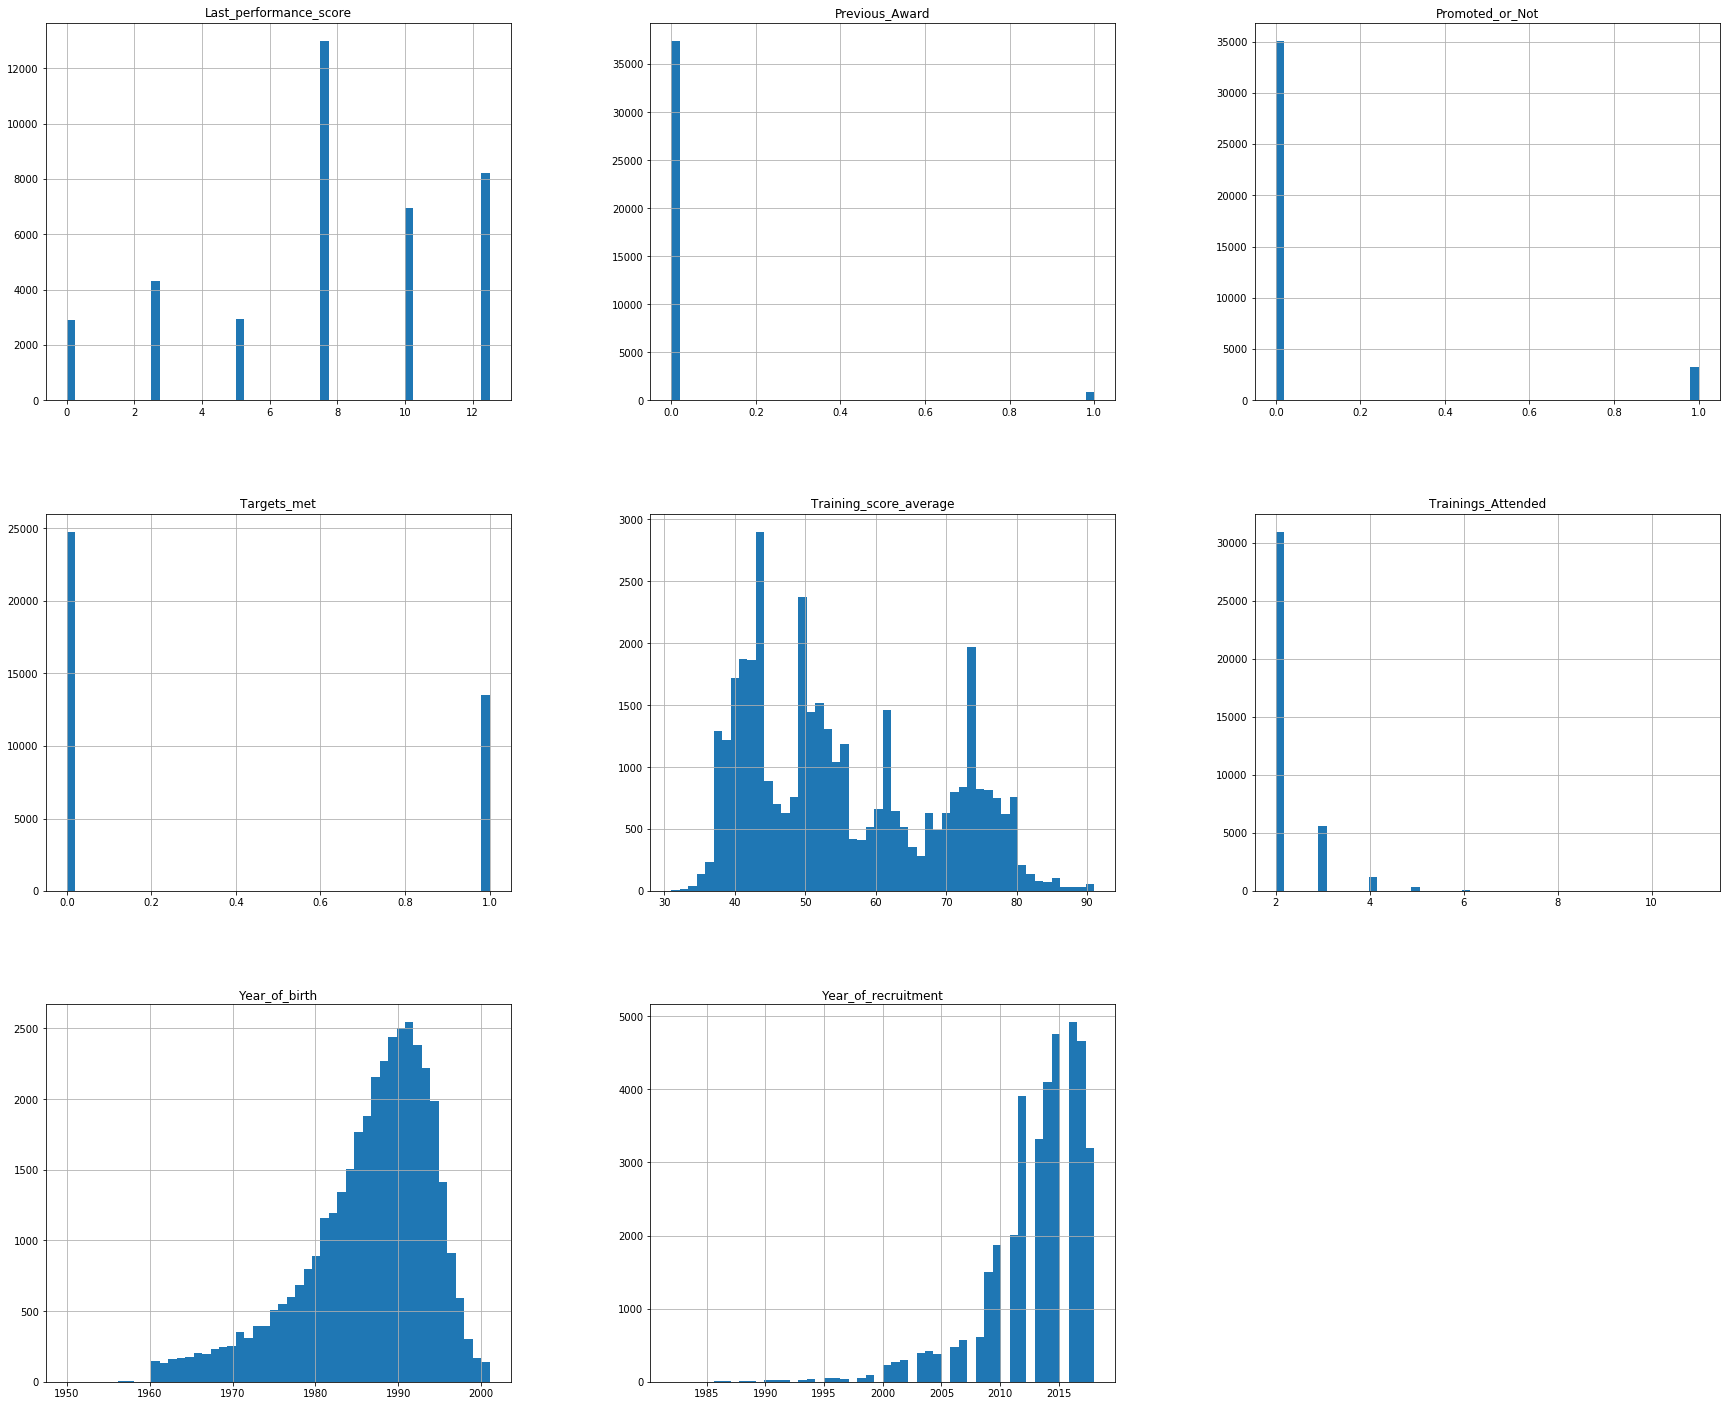

In [5]:
# visualise the buckets to see the distribution of the numerical data
full_dataset.hist(bins=50,figsize=(30,25))
# side-note convert the ages to respective buckets, there is an outlier that is older than 1960

In [6]:
# get a top-bottom statistical insight into the entire dataset
full_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Trainings_Attended,38312.0,2.253680,0.609443,2.0,2.0,2.0,2.0,11.0
Year_of_birth,38312.0,1986.209334,7.646047,1950.0,1982.0,1988.0,1992.0,2001.0
Last_performance_score,38312.0,7.698959,3.744135,0.0,5.0,7.5,10.0,12.5
Year_of_recruitment,38312.0,2013.139695,4.261451,1982.0,2012.0,2014.0,2016.0,2018.0
Targets_met,38312.0,0.352996,0.477908,0.0,0.0,0.0,1.0,1.0
Previous_Award,38312.0,0.023152,0.150388,0.0,0.0,0.0,0.0,1.0
Training_score_average,38312.0,55.366465,13.362741,31.0,43.0,52.0,68.0,91.0
Promoted_or_Not,38312.0,0.084595,0.278282,0.0,0.0,0.0,0.0,1.0


In [7]:
# check out the people who were born before 1960, since they are so few(12), we then turn them into category "people < 1960"
# the age is also normally distributed/slightly tail heavy,so there is no need for much transformation.
full_dataset[full_dataset['Year_of_birth']<1960].shape[0]
# min 1950   max 2001

12

In [8]:
full_dataset['No_of_previous_employers'].value_counts()

1              18867
0              13272
2               1918
3               1587
4               1324
5                943
More than 5      401
Name: No_of_previous_employers, dtype: int64

## Indepth Exploratory data analysis and Sidenotes

In [9]:
full_dataset.head(2)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0


In [10]:
full_dataset['Marital_Status'].value_counts()
# turn any not-sure into Single to prevent our algorithm from learning garbage

Married     31022
Single       6927
Not_Sure      363
Name: Marital_Status, dtype: int64

In [11]:
full_dataset['State_Of_Origin'].value_counts()
# i should probably map state of each state to the three major tribes to know if they are yoruba, igbo or hausa

LAGOS          6204
FCT            2389
OGUN           2302
RIVERS         2222
ANAMBRA        1710
KANO           1649
DELTA          1594
OYO            1508
KADUNA         1399
IMO            1307
EDO            1259
ENUGU          1025
ABIA            950
OSUN            929
ONDO            875
NIGER           857
KWARA           765
PLATEAU         739
AKWA IBOM       673
NASSARAWA       632
KATSINA         615
ADAMAWA         605
BENUE           579
BAUCHI          557
KOGI            542
SOKOTO          499
CROSS RIVER     495
EKITI           455
BORNO           447
TARABA          400
KEBBI           393
BAYELSA         324
EBONYI          313
GOMBE           291
ZAMFARA         290
JIGAWA          262
YOBE            257
Name: State_Of_Origin, dtype: int64

In [12]:
full_dataset['Trainings_Attended'].value_counts()
# since greater than 5 training is pretty few, i should consider making it anything>5 = 5

2     30981
3      5631
4      1244
5       316
6        93
7        28
8         6
10        5
11        4
9         4
Name: Trainings_Attended, dtype: int64

In [13]:
full_dataset['Channel_of_Recruitment'].value_counts()
# nothing here too. we just categorically encode them

Agency and others                  21310
Direct Internal process            16194
Referral and Special candidates      808
Name: Channel_of_Recruitment, dtype: int64

In [14]:
full_dataset['Gender'].value_counts()
# genders are fair, i guess. nothing much to see here, we just simply categorically encode it

Male      26880
Female    11432
Name: Gender, dtype: int64

In [15]:
full_dataset['Qualification'].value_counts()
# this seems pretty distributed too, but we categorically encode them wrt their level 3,2,1
# fill in missing values with Non-University Education

First Degree or HND         25578
MSc, MBA and PhD            10469
Non-University Education      586
Name: Qualification, dtype: int64

In [16]:
full_dataset['Division'].value_counts()
# pretty well distributed, no further engineering needed, simply categorically encoding them

Commercial Sales and Marketing                 11695
Customer Support and Field Operations           7973
Sourcing and Purchasing                         5052
Information Technology and Solution Support     4952
Information and Strategy                        3721
Business Finance Operations                     1786
People/HR Management                            1704
Regulatory and Legal services                    733
Research and Innovation                          696
Name: Division, dtype: int64

In [17]:
# note that the dataset it gr
full_dataset['Promoted_or_Not'].value_counts()

0    35071
1     3241
Name: Promoted_or_Not, dtype: int64

## Data Spliting

#### Split into Train,Testing and validation set (60%,25%,15%)

In [18]:
X=full_dataset.drop(['Promoted_or_Not'],1)
y=full_dataset['Promoted_or_Not']

In [19]:
# split into train and test/validation
X_train, X_test_valid, y_train, y_test_valid = train_test_split(X, y, test_size=0.4, random_state=42)

# split into test and validation
X_test,X_validation,y_test,y_validation=train_test_split(X_test_valid,y_test_valid,test_size=0.375)

In [20]:
# size of my batches of data
print("train size of rows:{} and columns:{}".format(*X_train.shape))
print("train size of rows:{} and columns:{}".format(*X_test.shape))
print("train size of rows:{} and columns:{}".format(*X_validation.shape))

train size of rows:22987 and columns:18
train size of rows:9578 and columns:18
train size of rows:5747 and columns:18


In [21]:
pd.value_counts(full_dataset["Qualification"])

First Degree or HND         25578
MSc, MBA and PhD            10469
Non-University Education      586
Name: Qualification, dtype: int64

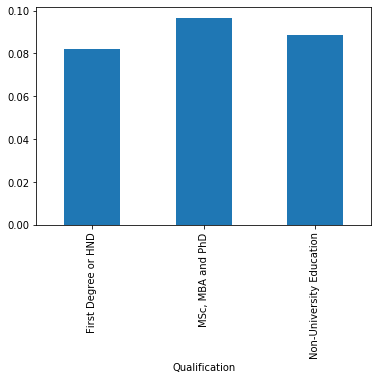

In [22]:
# visualise the average number of people from different qualification whp were promoted
full_dataset.groupby("Qualification")['Promoted_or_Not'].mean().plot(kind="bar")

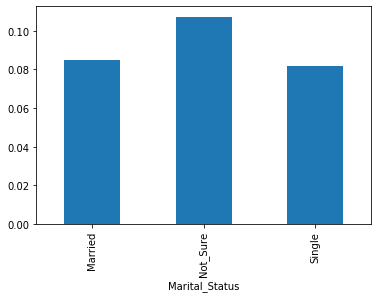

In [23]:
full_dataset.groupby("Marital_Status")['Promoted_or_Not'].mean().plot(kind="bar")

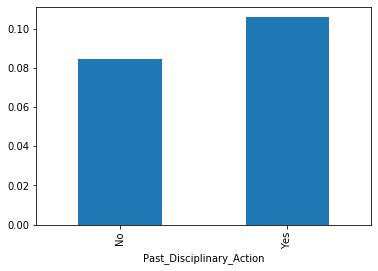

In [24]:
full_dataset.groupby("Past_Disciplinary_Action")['Promoted_or_Not'].mean().plot(kind="bar")

## Custom mappings we can use to transform our data

In [25]:
# manually curated mapping for categorical variables, these values were derived from my intuition and domain knowledge
qualification_to_number={'First Degree or HND':2, 'MSc, MBA and PhD':3, 'Non-University Education':1}
genderMap={"Male":1.1,"Female":3.5}
yesnoMap={"Yes":1,"No":0}
noyesMap={"Yes":0,"No":1}
states_to_tribe={
    'ABIA': "IGBO",
    'ADAMAWA':"HAUSA",
    'AKWA IBOM':"IGBO",
    'ANAMBRA':"IGBO",
    'BAUCHI':"IGBO",
    'BAYELSA':"IGBO",
    'BENUE':"HAUSA",
    'BORNO':"HAUSA",
    'CROSS RIVER':"IGBO",
    'DELTA':"IGBO",
    'EBONYI':"IGBO",
    'EDO':"IGBO",
    'EKITI':"YORUBA",
    'ENUGU':"IGBO",
    'FCT':"HAUSA",
    'GOMBE':"HAUSA",
    'IMO':"IGBO",
    'JIGAWA':"HAUSA",
    'KADUNA':"HAUSA",
    'KANO':'HAUSA',
    'KATSINA':"HAUSA",
    'KEBBI':"HAUSA",
    'KOGI':"HAUSA",
    'KWARA':"HAUSA",
    "LAGOS":"YORUBA",
    'NASSARAWA':"HAUSA",
    'NIGER':"HAUSA",
     'OGUN':"YORUBA",
     'ONDO':"YORUBA",
     'OSUN':"YORUBA",
     'OYO':"YORUBA",
     'PLATEAU':"HAUSA",
     'RIVERS':"IGBO",
     'SOKOTO':"HAUSA",
     'TARABA':"HAUSA",
     'YOBE':"HAUSA",
     'ZAMFARA':"HAUSA"
    }
    
dept_to_number={
    "Commercial Sales and Marketing":50.0,
    "Customer Support and Field Operations":31.4,
    "Business Finance Operations":30.7,
    "People/HR Management":30.4,
    "Sourcing and Purchasing":19.5,
    "Regulatory and Legal services":18.0,
    "Information Technology and Solution Support":7.3,
    "Information and Strategy":5.1,
    "Research and Innovation":4.3
}
maritalMap={"Married":1,"Single":0.5}

def map_employers(x):
    try: 
        return int(x)
    except:
        return 5

In [26]:
# create a mappinng function which returns a dictionary mapping of the average values of that category which are promoted
# this was developed out of sheer desperation to try and boost my score :/

def mapCategoricalToAverage(name):
    mapping=dict(full_dataset.groupby(name)['Promoted_or_Not'].mean())
    return lambda x: mapping[x]

qualification_num=input_data['Qualification'].map(mapCategoricalToAverage("Qualification")).values
foreign_schooled_num=input_data['Foreign_schooled'].map(mapCategoricalToAverage("Foreign_schooled")).values

## Specify my data transformations

In [27]:
from sklearn.base import BaseEstimator,TransformerMixin
full_dataset.head(3)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0


In [28]:
# specify the numeric columns we dont want to transform
numeric_columns=['Trainings_Attended', 'Year_of_birth', 'Last_performance_score', 'Year_of_recruitment', 'Targets_met', 'Previous_Award', 'Training_score_average']
class myTransformer():
    def __init__(self):
        self.division_binarizer=LabelBinarizer()
        self.channel_binariser=LabelBinarizer()
        self.tribe_binariser=LabelBinarizer()
        self.dataScaler=StandardScaler()
    
    # Fit all the binarisers on the training data
    def fit(self,input_data):
        self.division_binarizer=self.division_binarizer.fit(input_data['Division'])
        self.channel_binariser=self.channel_binariser.fit(input_data['Channel_of_Recruitment'])
        self.tribe_binariser=self.tribe_binariser.fit(input_data['State_Of_Origin'])
        
    # Transform the input data using the fitted binarisers
    def transform(self,full_dataset,train=False):
        #     making a copy of the input because we dont want to change the input in the main function
        input_data=full_dataset.copy()
        # label binarise the dvision
        division_binarised=self.division_binarizer.transform(input_data['Division'])

        # categorise the qualifications
        input_data['Qualification']=input_data['Qualification'].fillna("Non-University Education")
        qualification_num=input_data['Qualification'].map(mapCategoricalToAverage("Qualification")).values

        # categorise the gender
        gender_num=input_data["Gender"].map(mapCategoricalToAverage("Gender")).values

        # binarise the channel
        channel_binarised=self.channel_binariser.transform(input_data['Channel_of_Recruitment'])

        # map state of origin to tribe and binarise it
        state_binarised=self.tribe_binariser.transform(input_data['State_Of_Origin'])

        # map foreign schooled
        foreign_schooled_num=input_data['Foreign_schooled'].map(mapCategoricalToAverage("Foreign_schooled")).values

        # map marital status
#         marital_status_num=input_data['Marital_Status'].map(lambda x: "Single" if x=="Not_Sure" else x).map(maritalMap).values

        # map past disciplinary actions
        past_discipline_num=input_data['Past_Disciplinary_Action'].map(mapCategoricalToAverage("Past_Disciplinary_Action")).values

        # map interdep movement
        interdep_movement_num=input_data['Previous_IntraDepartmental_Movement'].map(mapCategoricalToAverage("Previous_IntraDepartmental_Movement")).values

        # map employer
        previous_employer_count=input_data['No_of_previous_employers'].map(mapCategoricalToAverage("No_of_previous_employers")).values

        numeric_data=input_data[numeric_columns].values
        
        # Create new variables
        qualification_times_scoreavg=(qualification_num*input_data['Training_score_average']).values
        department_times_scoreavg=(input_data['Division'].map(dept_to_number) * input_data['Training_score_average']).values
        department_in_number=input_data['Division'].map(dept_to_number)

        
        # this concatenates all the data
        fully_transformed=np.c_[qualification_times_scoreavg,department_times_scoreavg,department_in_number,division_binarised,qualification_num,gender_num,channel_binarised,state_binarised,foreign_schooled_num,past_discipline_num,interdep_movement_num,previous_employer_count,numeric_data]
#         fully_transformed=np.c_[division_binarised,qualification_num,gender_num,channel_binarised,state_binarised,foreign_schooled_num,marital_status_num,past_discipline_num,interdep_movement_num,previous_employer_count,numeric_data]
        return fully_transformed

## Spliting the training and testing and validation data

In [29]:
input_dataset=full_dataset.drop("Promoted_or_Not",1)
output_dataset=full_dataset["Promoted_or_Not"]

In [30]:
x_train,x_test_valid,y_train,y_test_valid=train_test_split(input_dataset,output_dataset,test_size=0.35,random_state=42)
x_test,x_valid,y_test,y_valid=train_test_split(x_test_valid,y_test_valid,test_size=0.3,random_state=42)

## Transforming the train_set and the test_set and validation_set

In [31]:
transformer=myTransformer()
transformer.fit(x_train)

In [32]:
transformed_x_train=transformer.transform(x_train,train=True)
transformed_x_test=transformer.transform(x_test)
transformed_x_valid=transformer.transform(x_valid)

In [33]:
pd.value_counts(y_train)

0    22785
1     2117
Name: Promoted_or_Not, dtype: int64

#### the ratio of 10 to 0 is so imbalanced, we need to balance them by augumenting the data

In [34]:
transformed_x_train.shape

(24902, 65)

## Augumenting the imbalanced dataset

In [35]:
# use adasyn to balance the dataset
def makeOverSamplesADASYN(X,y):
 #input DataFrame
 #X →Independent Variable in DataFrame\
 #y →dependent Variable in Pandas DataFrame format
     from imblearn.over_sampling import ADASYN 
     sm = ADASYN()
     X,y = sm.fit_sample(X, y)
     return(X,y)
    
balanced_x_train,balanced_y_train=makeOverSamplesADASYN(transformed_x_train,y_train)

Using TensorFlow backend.


In [36]:
pd.value_counts(balanced_y_train)

1    23159
0    22785
dtype: int64

#### Finally, our training set is now balanced as the values of 1 and 0 are almost equal

## Finally training the model

#### using xg-boost as my base model

In [37]:
from xgboost import XGBClassifier
from sklearn import metrics

In [38]:
clf = XGBClassifier(base_score=0.7,booster="dart",n_estimators=3000,
                    max_depth=8,learning_rate=0.01,objective='binary:logistic',subsample=0.9,reg_lambda=0.03)
eval_set  = [(transformed_x_train,y_train), (transformed_x_test,y_test)]
#.900057
# clf.fit(transformed_x_train, y_train, eval_set=eval_set,eval_metric="auc", early_stopping_rounds=200)

#### testing the xgboost model

In [39]:
y_train_pred = clf.predict(transformed_x_train)
# how did our model perform on the train set?
count_misclassified = (y_train != y_train_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_train_pred, y_train)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 1324
Accuracy: 0.95


In [40]:
y_valid_pred = clf.predict(transformed_x_valid)
# how did our model perform on the test set?
count_misclassified = (y_valid != y_valid_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_valid_pred, y_valid)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 251
Accuracy: 0.94


## checking out lgmboost

In [39]:
import lightgbm 
lightgbm.LGBMClassifier()

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [40]:
gbm = lightgbm.LGBMClassifier(boosting_type="dart",n_estimators=10000,learning_rate=0.01,num_leaves = 15,max_depth=6,subsample=0.9
                              ,colsample_bytree=0.3,reg_lambda=0.9,early_stopping_rounds=50)

In [67]:
gbm.fit(balanced_x_train,balanced_y_train,eval_metric='auc',eval_set=[(transformed_x_test, y_test)],early_stopping_rounds=10000)

C:\Users\Admin\Anaconda3\lib\site-packages\lightgbm\engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Admin\Anaconda3\lib\site-packages\lightgbm\callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[1]	valid_0's auc: 0.648033	valid_0's binary_logloss: 0.696119
[2]	valid_0's auc: 0.628972	valid_0's binary_logloss: 0.691835
[3]	valid_0's auc: 0.67337	valid_0's binary_logloss: 0.688189
[4]	valid_0's auc: 0.700827	valid_0's binary_logloss: 0.684839
[5]	valid_0's auc: 0.697513	valid_0's binary_logloss: 0.681222
[6]	valid_0's auc: 0.696789	valid_0's binary_logloss: 0.67745
[7]	valid_0's auc: 0.767384	valid_0's binary_logloss: 0.672668
[8]	valid_0's auc: 0.786281	valid_0's binary_logloss: 0.673566
[9]	valid_0's auc: 0.778618	valid_0's binary_logloss: 0.669788
[10]	valid_0's auc: 0.783175	valid_0's binary_logloss: 0.667282
[11]	valid_0's auc: 0.775282	valid_0's binary_logloss: 0.663691
[12]	valid_0's auc: 0.782378	valid_0's binary_logloss: 0.665207
[13]	valid_0's auc: 0.776653	valid_0's binary_logloss: 0.662109
[14]	valid_0's auc: 0.772848	valid_0's binary_logloss: 0.658787
[15]	valid_0's auc: 0.777655	valid_0's binary_logloss: 0.65484
[16]	valid_0's auc: 0.782634	valid_0's binary_loglos

[137]	valid_0's auc: 0.846832	valid_0's binary_logloss: 0.540236
[138]	valid_0's auc: 0.846775	valid_0's binary_logloss: 0.537667
[139]	valid_0's auc: 0.846837	valid_0's binary_logloss: 0.535593
[140]	valid_0's auc: 0.84706	valid_0's binary_logloss: 0.537044
[141]	valid_0's auc: 0.847161	valid_0's binary_logloss: 0.538136
[142]	valid_0's auc: 0.847429	valid_0's binary_logloss: 0.539186
[143]	valid_0's auc: 0.847383	valid_0's binary_logloss: 0.536694
[144]	valid_0's auc: 0.847455	valid_0's binary_logloss: 0.537614
[145]	valid_0's auc: 0.847353	valid_0's binary_logloss: 0.535276
[146]	valid_0's auc: 0.847276	valid_0's binary_logloss: 0.536416
[147]	valid_0's auc: 0.847469	valid_0's binary_logloss: 0.537665
[148]	valid_0's auc: 0.847541	valid_0's binary_logloss: 0.538841
[149]	valid_0's auc: 0.847059	valid_0's binary_logloss: 0.535747
[150]	valid_0's auc: 0.846901	valid_0's binary_logloss: 0.533638
[151]	valid_0's auc: 0.846773	valid_0's binary_logloss: 0.534819
[152]	valid_0's auc: 0.846

[270]	valid_0's auc: 0.847815	valid_0's binary_logloss: 0.456113
[271]	valid_0's auc: 0.847858	valid_0's binary_logloss: 0.457153
[272]	valid_0's auc: 0.848744	valid_0's binary_logloss: 0.455605
[273]	valid_0's auc: 0.850323	valid_0's binary_logloss: 0.453391
[274]	valid_0's auc: 0.849999	valid_0's binary_logloss: 0.454422
[275]	valid_0's auc: 0.84972	valid_0's binary_logloss: 0.452204
[276]	valid_0's auc: 0.849891	valid_0's binary_logloss: 0.453329
[277]	valid_0's auc: 0.850213	valid_0's binary_logloss: 0.452086
[278]	valid_0's auc: 0.850181	valid_0's binary_logloss: 0.453048
[279]	valid_0's auc: 0.850173	valid_0's binary_logloss: 0.451614
[280]	valid_0's auc: 0.850242	valid_0's binary_logloss: 0.452712
[281]	valid_0's auc: 0.850292	valid_0's binary_logloss: 0.453614
[282]	valid_0's auc: 0.850989	valid_0's binary_logloss: 0.451385
[283]	valid_0's auc: 0.850936	valid_0's binary_logloss: 0.45256
[284]	valid_0's auc: 0.852012	valid_0's binary_logloss: 0.450404
[285]	valid_0's auc: 0.8517

[401]	valid_0's auc: 0.857951	valid_0's binary_logloss: 0.398641
[402]	valid_0's auc: 0.858156	valid_0's binary_logloss: 0.397466
[403]	valid_0's auc: 0.858164	valid_0's binary_logloss: 0.398246
[404]	valid_0's auc: 0.858314	valid_0's binary_logloss: 0.396941
[405]	valid_0's auc: 0.858537	valid_0's binary_logloss: 0.395714
[406]	valid_0's auc: 0.858527	valid_0's binary_logloss: 0.396527
[407]	valid_0's auc: 0.858722	valid_0's binary_logloss: 0.394956
[408]	valid_0's auc: 0.858661	valid_0's binary_logloss: 0.395847
[409]	valid_0's auc: 0.858592	valid_0's binary_logloss: 0.394885
[410]	valid_0's auc: 0.858453	valid_0's binary_logloss: 0.39383
[411]	valid_0's auc: 0.858278	valid_0's binary_logloss: 0.392725
[412]	valid_0's auc: 0.858272	valid_0's binary_logloss: 0.393496
[413]	valid_0's auc: 0.858153	valid_0's binary_logloss: 0.394321
[414]	valid_0's auc: 0.858884	valid_0's binary_logloss: 0.392575
[415]	valid_0's auc: 0.858374	valid_0's binary_logloss: 0.391059
[416]	valid_0's auc: 0.858

[533]	valid_0's auc: 0.860482	valid_0's binary_logloss: 0.349317
[534]	valid_0's auc: 0.860582	valid_0's binary_logloss: 0.348673
[535]	valid_0's auc: 0.861264	valid_0's binary_logloss: 0.347307
[536]	valid_0's auc: 0.861262	valid_0's binary_logloss: 0.347827
[537]	valid_0's auc: 0.861326	valid_0's binary_logloss: 0.346747
[538]	valid_0's auc: 0.861377	valid_0's binary_logloss: 0.346078
[539]	valid_0's auc: 0.861336	valid_0's binary_logloss: 0.34673
[540]	valid_0's auc: 0.86136	valid_0's binary_logloss: 0.347351
[541]	valid_0's auc: 0.861368	valid_0's binary_logloss: 0.347943
[542]	valid_0's auc: 0.861413	valid_0's binary_logloss: 0.347072
[543]	valid_0's auc: 0.861409	valid_0's binary_logloss: 0.347743
[544]	valid_0's auc: 0.861369	valid_0's binary_logloss: 0.348339
[545]	valid_0's auc: 0.860904	valid_0's binary_logloss: 0.347373
[546]	valid_0's auc: 0.861962	valid_0's binary_logloss: 0.346005
[547]	valid_0's auc: 0.862303	valid_0's binary_logloss: 0.34519
[548]	valid_0's auc: 0.86204

[661]	valid_0's auc: 0.862085	valid_0's binary_logloss: 0.328239
[662]	valid_0's auc: 0.861586	valid_0's binary_logloss: 0.327562
[663]	valid_0's auc: 0.861592	valid_0's binary_logloss: 0.328002
[664]	valid_0's auc: 0.861584	valid_0's binary_logloss: 0.328465
[665]	valid_0's auc: 0.861598	valid_0's binary_logloss: 0.32889
[666]	valid_0's auc: 0.861625	valid_0's binary_logloss: 0.329333
[667]	valid_0's auc: 0.861565	valid_0's binary_logloss: 0.329852
[668]	valid_0's auc: 0.861612	valid_0's binary_logloss: 0.330292
[669]	valid_0's auc: 0.861909	valid_0's binary_logloss: 0.329765
[670]	valid_0's auc: 0.86189	valid_0's binary_logloss: 0.329089
[671]	valid_0's auc: 0.86189	valid_0's binary_logloss: 0.329462
[672]	valid_0's auc: 0.862088	valid_0's binary_logloss: 0.32892
[673]	valid_0's auc: 0.862094	valid_0's binary_logloss: 0.329327
[674]	valid_0's auc: 0.862042	valid_0's binary_logloss: 0.328719
[675]	valid_0's auc: 0.862392	valid_0's binary_logloss: 0.327945
[676]	valid_0's auc: 0.862563

[792]	valid_0's auc: 0.867034	valid_0's binary_logloss: 0.307982
[793]	valid_0's auc: 0.867018	valid_0's binary_logloss: 0.307402
[794]	valid_0's auc: 0.867022	valid_0's binary_logloss: 0.307764
[795]	valid_0's auc: 0.867125	valid_0's binary_logloss: 0.30726
[796]	valid_0's auc: 0.867141	valid_0's binary_logloss: 0.307587
[797]	valid_0's auc: 0.867151	valid_0's binary_logloss: 0.307986
[798]	valid_0's auc: 0.867142	valid_0's binary_logloss: 0.308315
[799]	valid_0's auc: 0.867078	valid_0's binary_logloss: 0.307762
[800]	valid_0's auc: 0.867054	valid_0's binary_logloss: 0.308146
[801]	valid_0's auc: 0.866828	valid_0's binary_logloss: 0.307458
[802]	valid_0's auc: 0.866812	valid_0's binary_logloss: 0.307754
[803]	valid_0's auc: 0.866837	valid_0's binary_logloss: 0.30805
[804]	valid_0's auc: 0.866875	valid_0's binary_logloss: 0.308413
[805]	valid_0's auc: 0.866869	valid_0's binary_logloss: 0.308741
[806]	valid_0's auc: 0.866886	valid_0's binary_logloss: 0.309058
[807]	valid_0's auc: 0.8676

[919]	valid_0's auc: 0.868016	valid_0's binary_logloss: 0.291664
[920]	valid_0's auc: 0.868054	valid_0's binary_logloss: 0.291945
[921]	valid_0's auc: 0.868037	valid_0's binary_logloss: 0.292231
[922]	valid_0's auc: 0.868026	valid_0's binary_logloss: 0.29253
[923]	valid_0's auc: 0.868038	valid_0's binary_logloss: 0.292775
[924]	valid_0's auc: 0.868124	valid_0's binary_logloss: 0.292195
[925]	valid_0's auc: 0.868018	valid_0's binary_logloss: 0.291739
[926]	valid_0's auc: 0.868683	valid_0's binary_logloss: 0.29088
[927]	valid_0's auc: 0.868692	valid_0's binary_logloss: 0.29117
[928]	valid_0's auc: 0.868669	valid_0's binary_logloss: 0.291438
[929]	valid_0's auc: 0.868405	valid_0's binary_logloss: 0.290867
[930]	valid_0's auc: 0.868493	valid_0's binary_logloss: 0.290398
[931]	valid_0's auc: 0.868503	valid_0's binary_logloss: 0.290645
[932]	valid_0's auc: 0.868497	valid_0's binary_logloss: 0.290931
[933]	valid_0's auc: 0.868496	valid_0's binary_logloss: 0.290448
[934]	valid_0's auc: 0.86829

[1047]	valid_0's auc: 0.873917	valid_0's binary_logloss: 0.272379
[1048]	valid_0's auc: 0.873854	valid_0's binary_logloss: 0.272028
[1049]	valid_0's auc: 0.87384	valid_0's binary_logloss: 0.272258
[1050]	valid_0's auc: 0.873662	valid_0's binary_logloss: 0.271812
[1051]	valid_0's auc: 0.873664	valid_0's binary_logloss: 0.271984
[1052]	valid_0's auc: 0.873686	valid_0's binary_logloss: 0.272153
[1053]	valid_0's auc: 0.873634	valid_0's binary_logloss: 0.271783
[1054]	valid_0's auc: 0.873751	valid_0's binary_logloss: 0.271403
[1055]	valid_0's auc: 0.873741	valid_0's binary_logloss: 0.271644
[1056]	valid_0's auc: 0.87369	valid_0's binary_logloss: 0.271062
[1057]	valid_0's auc: 0.873692	valid_0's binary_logloss: 0.27132
[1058]	valid_0's auc: 0.873701	valid_0's binary_logloss: 0.271557
[1059]	valid_0's auc: 0.873704	valid_0's binary_logloss: 0.271767
[1060]	valid_0's auc: 0.873704	valid_0's binary_logloss: 0.271981
[1061]	valid_0's auc: 0.873763	valid_0's binary_logloss: 0.272195
[1062]	valid_

[1172]	valid_0's auc: 0.876762	valid_0's binary_logloss: 0.263889
[1173]	valid_0's auc: 0.876758	valid_0's binary_logloss: 0.263567
[1174]	valid_0's auc: 0.876769	valid_0's binary_logloss: 0.263771
[1175]	valid_0's auc: 0.876777	valid_0's binary_logloss: 0.263937
[1176]	valid_0's auc: 0.876787	valid_0's binary_logloss: 0.263647
[1177]	valid_0's auc: 0.876812	valid_0's binary_logloss: 0.263807
[1178]	valid_0's auc: 0.876819	valid_0's binary_logloss: 0.264013
[1179]	valid_0's auc: 0.876787	valid_0's binary_logloss: 0.263688
[1180]	valid_0's auc: 0.87681	valid_0's binary_logloss: 0.263843
[1181]	valid_0's auc: 0.876828	valid_0's binary_logloss: 0.264
[1182]	valid_0's auc: 0.876766	valid_0's binary_logloss: 0.263699
[1183]	valid_0's auc: 0.876756	valid_0's binary_logloss: 0.263312
[1184]	valid_0's auc: 0.87664	valid_0's binary_logloss: 0.263026
[1185]	valid_0's auc: 0.876563	valid_0's binary_logloss: 0.262515
[1186]	valid_0's auc: 0.876562	valid_0's binary_logloss: 0.262746
[1187]	valid_0'

[1424]	valid_0's auc: 0.881954	valid_0's binary_logloss: 0.243313
[1425]	valid_0's auc: 0.881958	valid_0's binary_logloss: 0.243436
[1426]	valid_0's auc: 0.881946	valid_0's binary_logloss: 0.243178
[1427]	valid_0's auc: 0.881913	valid_0's binary_logloss: 0.242946
[1428]	valid_0's auc: 0.881923	valid_0's binary_logloss: 0.24308
[1429]	valid_0's auc: 0.881879	valid_0's binary_logloss: 0.242882
[1430]	valid_0's auc: 0.881895	valid_0's binary_logloss: 0.24301
[1431]	valid_0's auc: 0.881899	valid_0's binary_logloss: 0.243167
[1432]	valid_0's auc: 0.881909	valid_0's binary_logloss: 0.2433
[1433]	valid_0's auc: 0.882228	valid_0's binary_logloss: 0.242795
[1434]	valid_0's auc: 0.882239	valid_0's binary_logloss: 0.242946
[1435]	valid_0's auc: 0.882245	valid_0's binary_logloss: 0.243086
[1436]	valid_0's auc: 0.882261	valid_0's binary_logloss: 0.243193
[1437]	valid_0's auc: 0.882679	valid_0's binary_logloss: 0.242712
[1438]	valid_0's auc: 0.882686	valid_0's binary_logloss: 0.242872
[1439]	valid_0

[1553]	valid_0's auc: 0.884892	valid_0's binary_logloss: 0.237406
[1554]	valid_0's auc: 0.88488	valid_0's binary_logloss: 0.237074
[1555]	valid_0's auc: 0.884806	valid_0's binary_logloss: 0.236871
[1556]	valid_0's auc: 0.884823	valid_0's binary_logloss: 0.237018
[1557]	valid_0's auc: 0.884834	valid_0's binary_logloss: 0.237129
[1558]	valid_0's auc: 0.884844	valid_0's binary_logloss: 0.23725
[1559]	valid_0's auc: 0.884798	valid_0's binary_logloss: 0.23701
[1560]	valid_0's auc: 0.884805	valid_0's binary_logloss: 0.237133
[1561]	valid_0's auc: 0.884706	valid_0's binary_logloss: 0.236875
[1562]	valid_0's auc: 0.884713	valid_0's binary_logloss: 0.237013
[1563]	valid_0's auc: 0.884723	valid_0's binary_logloss: 0.237143
[1564]	valid_0's auc: 0.884685	valid_0's binary_logloss: 0.236929
[1565]	valid_0's auc: 0.884693	valid_0's binary_logloss: 0.237077
[1566]	valid_0's auc: 0.884662	valid_0's binary_logloss: 0.236846
[1567]	valid_0's auc: 0.884669	valid_0's binary_logloss: 0.236964
[1568]	valid_

[1683]	valid_0's auc: 0.885883	valid_0's binary_logloss: 0.227913
[1684]	valid_0's auc: 0.885887	valid_0's binary_logloss: 0.227992
[1685]	valid_0's auc: 0.885777	valid_0's binary_logloss: 0.227739
[1686]	valid_0's auc: 0.885931	valid_0's binary_logloss: 0.227367
[1687]	valid_0's auc: 0.885854	valid_0's binary_logloss: 0.227208
[1688]	valid_0's auc: 0.885879	valid_0's binary_logloss: 0.227318
[1689]	valid_0's auc: 0.885863	valid_0's binary_logloss: 0.227144
[1690]	valid_0's auc: 0.885842	valid_0's binary_logloss: 0.226876
[1691]	valid_0's auc: 0.885845	valid_0's binary_logloss: 0.226687
[1692]	valid_0's auc: 0.885858	valid_0's binary_logloss: 0.226769
[1693]	valid_0's auc: 0.885852	valid_0's binary_logloss: 0.226645
[1694]	valid_0's auc: 0.885861	valid_0's binary_logloss: 0.226475
[1695]	valid_0's auc: 0.885779	valid_0's binary_logloss: 0.226283
[1696]	valid_0's auc: 0.885775	valid_0's binary_logloss: 0.226385
[1697]	valid_0's auc: 0.885764	valid_0's binary_logloss: 0.226541
[1698]	val

[1811]	valid_0's auc: 0.887797	valid_0's binary_logloss: 0.220221
[1812]	valid_0's auc: 0.887824	valid_0's binary_logloss: 0.219991
[1813]	valid_0's auc: 0.887848	valid_0's binary_logloss: 0.219847
[1814]	valid_0's auc: 0.88785	valid_0's binary_logloss: 0.219928
[1815]	valid_0's auc: 0.887813	valid_0's binary_logloss: 0.219774
[1816]	valid_0's auc: 0.887822	valid_0's binary_logloss: 0.219865
[1817]	valid_0's auc: 0.88783	valid_0's binary_logloss: 0.219731
[1818]	valid_0's auc: 0.887875	valid_0's binary_logloss: 0.219569
[1819]	valid_0's auc: 0.887884	valid_0's binary_logloss: 0.219655
[1820]	valid_0's auc: 0.88788	valid_0's binary_logloss: 0.219525
[1821]	valid_0's auc: 0.887885	valid_0's binary_logloss: 0.219624
[1822]	valid_0's auc: 0.887882	valid_0's binary_logloss: 0.219745
[1823]	valid_0's auc: 0.88807	valid_0's binary_logloss: 0.219391
[1824]	valid_0's auc: 0.888079	valid_0's binary_logloss: 0.21946
[1825]	valid_0's auc: 0.888085	valid_0's binary_logloss: 0.21953
[1826]	valid_0's

[1936]	valid_0's auc: 0.888858	valid_0's binary_logloss: 0.2165
[1937]	valid_0's auc: 0.888865	valid_0's binary_logloss: 0.216559
[1938]	valid_0's auc: 0.888863	valid_0's binary_logloss: 0.216386
[1939]	valid_0's auc: 0.889056	valid_0's binary_logloss: 0.21603
[1940]	valid_0's auc: 0.889227	valid_0's binary_logloss: 0.215646
[1941]	valid_0's auc: 0.889232	valid_0's binary_logloss: 0.21572
[1942]	valid_0's auc: 0.889184	valid_0's binary_logloss: 0.215599
[1943]	valid_0's auc: 0.889178	valid_0's binary_logloss: 0.215444
[1944]	valid_0's auc: 0.889172	valid_0's binary_logloss: 0.215324
[1945]	valid_0's auc: 0.889413	valid_0's binary_logloss: 0.215024
[1946]	valid_0's auc: 0.889413	valid_0's binary_logloss: 0.21513
[1947]	valid_0's auc: 0.889421	valid_0's binary_logloss: 0.215206
[1948]	valid_0's auc: 0.889348	valid_0's binary_logloss: 0.215076
[1949]	valid_0's auc: 0.889582	valid_0's binary_logloss: 0.214805
[1950]	valid_0's auc: 0.889587	valid_0's binary_logloss: 0.214678
[1951]	valid_0'

[2061]	valid_0's auc: 0.889946	valid_0's binary_logloss: 0.210515
[2062]	valid_0's auc: 0.889949	valid_0's binary_logloss: 0.21057
[2063]	valid_0's auc: 0.889959	valid_0's binary_logloss: 0.21063
[2064]	valid_0's auc: 0.889962	valid_0's binary_logloss: 0.210698
[2065]	valid_0's auc: 0.889965	valid_0's binary_logloss: 0.210763
[2066]	valid_0's auc: 0.889964	valid_0's binary_logloss: 0.210853
[2067]	valid_0's auc: 0.889912	valid_0's binary_logloss: 0.210782
[2068]	valid_0's auc: 0.889914	valid_0's binary_logloss: 0.210832
[2069]	valid_0's auc: 0.889918	valid_0's binary_logloss: 0.210907
[2070]	valid_0's auc: 0.889921	valid_0's binary_logloss: 0.210982
[2071]	valid_0's auc: 0.889911	valid_0's binary_logloss: 0.210866
[2072]	valid_0's auc: 0.889913	valid_0's binary_logloss: 0.210925
[2073]	valid_0's auc: 0.889894	valid_0's binary_logloss: 0.21081
[2074]	valid_0's auc: 0.889893	valid_0's binary_logloss: 0.21089
[2075]	valid_0's auc: 0.889908	valid_0's binary_logloss: 0.210722
[2076]	valid_0

[2188]	valid_0's auc: 0.892158	valid_0's binary_logloss: 0.205881
[2189]	valid_0's auc: 0.892128	valid_0's binary_logloss: 0.205787
[2190]	valid_0's auc: 0.892129	valid_0's binary_logloss: 0.205856
[2191]	valid_0's auc: 0.892249	valid_0's binary_logloss: 0.205566
[2192]	valid_0's auc: 0.892249	valid_0's binary_logloss: 0.205622
[2193]	valid_0's auc: 0.892304	valid_0's binary_logloss: 0.205403
[2194]	valid_0's auc: 0.892291	valid_0's binary_logloss: 0.205318
[2195]	valid_0's auc: 0.89226	valid_0's binary_logloss: 0.205251
[2196]	valid_0's auc: 0.892267	valid_0's binary_logloss: 0.205322
[2197]	valid_0's auc: 0.892274	valid_0's binary_logloss: 0.205387
[2198]	valid_0's auc: 0.89226	valid_0's binary_logloss: 0.205294
[2199]	valid_0's auc: 0.892296	valid_0's binary_logloss: 0.205186
[2200]	valid_0's auc: 0.89232	valid_0's binary_logloss: 0.205028
[2201]	valid_0's auc: 0.892322	valid_0's binary_logloss: 0.205071
[2202]	valid_0's auc: 0.892326	valid_0's binary_logloss: 0.205136
[2203]	valid_

[2314]	valid_0's auc: 0.893283	valid_0's binary_logloss: 0.201485
[2315]	valid_0's auc: 0.893388	valid_0's binary_logloss: 0.201201
[2316]	valid_0's auc: 0.893408	valid_0's binary_logloss: 0.201061
[2317]	valid_0's auc: 0.893513	valid_0's binary_logloss: 0.200904
[2318]	valid_0's auc: 0.893478	valid_0's binary_logloss: 0.200836
[2319]	valid_0's auc: 0.893483	valid_0's binary_logloss: 0.200882
[2320]	valid_0's auc: 0.893477	valid_0's binary_logloss: 0.200799
[2321]	valid_0's auc: 0.893489	valid_0's binary_logloss: 0.200698
[2322]	valid_0's auc: 0.893489	valid_0's binary_logloss: 0.20074
[2323]	valid_0's auc: 0.893574	valid_0's binary_logloss: 0.200595
[2324]	valid_0's auc: 0.893506	valid_0's binary_logloss: 0.200529
[2325]	valid_0's auc: 0.893512	valid_0's binary_logloss: 0.200574
[2326]	valid_0's auc: 0.893481	valid_0's binary_logloss: 0.200523
[2327]	valid_0's auc: 0.893474	valid_0's binary_logloss: 0.200358
[2328]	valid_0's auc: 0.893481	valid_0's binary_logloss: 0.200417
[2329]	vali

[2439]	valid_0's auc: 0.894788	valid_0's binary_logloss: 0.197236
[2440]	valid_0's auc: 0.894789	valid_0's binary_logloss: 0.197283
[2441]	valid_0's auc: 0.894775	valid_0's binary_logloss: 0.197236
[2442]	valid_0's auc: 0.894773	valid_0's binary_logloss: 0.19729
[2443]	valid_0's auc: 0.894779	valid_0's binary_logloss: 0.197164
[2444]	valid_0's auc: 0.894853	valid_0's binary_logloss: 0.196911
[2445]	valid_0's auc: 0.894858	valid_0's binary_logloss: 0.19696
[2446]	valid_0's auc: 0.894862	valid_0's binary_logloss: 0.197017
[2447]	valid_0's auc: 0.894859	valid_0's binary_logloss: 0.196965
[2448]	valid_0's auc: 0.894864	valid_0's binary_logloss: 0.197027
[2449]	valid_0's auc: 0.894817	valid_0's binary_logloss: 0.196957
[2450]	valid_0's auc: 0.894816	valid_0's binary_logloss: 0.197008
[2451]	valid_0's auc: 0.894939	valid_0's binary_logloss: 0.196767
[2452]	valid_0's auc: 0.895072	valid_0's binary_logloss: 0.196488
[2453]	valid_0's auc: 0.895076	valid_0's binary_logloss: 0.196533
[2454]	valid

[2564]	valid_0's auc: 0.896078	valid_0's binary_logloss: 0.193978
[2565]	valid_0's auc: 0.896078	valid_0's binary_logloss: 0.194029
[2566]	valid_0's auc: 0.896084	valid_0's binary_logloss: 0.19407
[2567]	valid_0's auc: 0.896092	valid_0's binary_logloss: 0.194005
[2568]	valid_0's auc: 0.896133	valid_0's binary_logloss: 0.193777
[2569]	valid_0's auc: 0.896134	valid_0's binary_logloss: 0.19383
[2570]	valid_0's auc: 0.896147	valid_0's binary_logloss: 0.193695
[2571]	valid_0's auc: 0.896124	valid_0's binary_logloss: 0.193631
[2572]	valid_0's auc: 0.896124	valid_0's binary_logloss: 0.193698
[2573]	valid_0's auc: 0.896124	valid_0's binary_logloss: 0.19363
[2574]	valid_0's auc: 0.896125	valid_0's binary_logloss: 0.193688
[2575]	valid_0's auc: 0.896111	valid_0's binary_logloss: 0.193626
[2576]	valid_0's auc: 0.896106	valid_0's binary_logloss: 0.193559
[2577]	valid_0's auc: 0.896112	valid_0's binary_logloss: 0.193611
[2578]	valid_0's auc: 0.896162	valid_0's binary_logloss: 0.193463
[2579]	valid_

[2689]	valid_0's auc: 0.897336	valid_0's binary_logloss: 0.190967
[2690]	valid_0's auc: 0.897329	valid_0's binary_logloss: 0.190933
[2691]	valid_0's auc: 0.897339	valid_0's binary_logloss: 0.19087
[2692]	valid_0's auc: 0.897371	valid_0's binary_logloss: 0.19079
[2693]	valid_0's auc: 0.897387	valid_0's binary_logloss: 0.190696
[2694]	valid_0's auc: 0.897445	valid_0's binary_logloss: 0.190562
[2695]	valid_0's auc: 0.897448	valid_0's binary_logloss: 0.19051
[2696]	valid_0's auc: 0.89745	valid_0's binary_logloss: 0.190541
[2697]	valid_0's auc: 0.89753	valid_0's binary_logloss: 0.190465
[2698]	valid_0's auc: 0.897532	valid_0's binary_logloss: 0.190506
[2699]	valid_0's auc: 0.897527	valid_0's binary_logloss: 0.190551
[2700]	valid_0's auc: 0.897554	valid_0's binary_logloss: 0.190487
[2701]	valid_0's auc: 0.897555	valid_0's binary_logloss: 0.190435
[2702]	valid_0's auc: 0.897592	valid_0's binary_logloss: 0.190355
[2703]	valid_0's auc: 0.897592	valid_0's binary_logloss: 0.190396
[2704]	valid_0'

[2817]	valid_0's auc: 0.89822	valid_0's binary_logloss: 0.189912
[2818]	valid_0's auc: 0.89822	valid_0's binary_logloss: 0.189939
[2819]	valid_0's auc: 0.89823	valid_0's binary_logloss: 0.189842
[2820]	valid_0's auc: 0.89821	valid_0's binary_logloss: 0.189781
[2821]	valid_0's auc: 0.898214	valid_0's binary_logloss: 0.189813
[2822]	valid_0's auc: 0.898217	valid_0's binary_logloss: 0.189856
[2823]	valid_0's auc: 0.898223	valid_0's binary_logloss: 0.189886
[2824]	valid_0's auc: 0.898272	valid_0's binary_logloss: 0.189819
[2825]	valid_0's auc: 0.898273	valid_0's binary_logloss: 0.189864
[2826]	valid_0's auc: 0.898273	valid_0's binary_logloss: 0.189891
[2827]	valid_0's auc: 0.898271	valid_0's binary_logloss: 0.189927
[2828]	valid_0's auc: 0.898261	valid_0's binary_logloss: 0.189867
[2829]	valid_0's auc: 0.898308	valid_0's binary_logloss: 0.189767
[2830]	valid_0's auc: 0.898349	valid_0's binary_logloss: 0.189695
[2831]	valid_0's auc: 0.898346	valid_0's binary_logloss: 0.18965
[2832]	valid_0'

[2942]	valid_0's auc: 0.898987	valid_0's binary_logloss: 0.186968
[2943]	valid_0's auc: 0.899008	valid_0's binary_logloss: 0.186805
[2944]	valid_0's auc: 0.899006	valid_0's binary_logloss: 0.186751
[2945]	valid_0's auc: 0.899004	valid_0's binary_logloss: 0.186782
[2946]	valid_0's auc: 0.899004	valid_0's binary_logloss: 0.186809
[2947]	valid_0's auc: 0.898972	valid_0's binary_logloss: 0.186771
[2948]	valid_0's auc: 0.89898	valid_0's binary_logloss: 0.186806
[2949]	valid_0's auc: 0.898982	valid_0's binary_logloss: 0.186835
[2950]	valid_0's auc: 0.898993	valid_0's binary_logloss: 0.186737
[2951]	valid_0's auc: 0.899001	valid_0's binary_logloss: 0.18665
[2952]	valid_0's auc: 0.899002	valid_0's binary_logloss: 0.186676
[2953]	valid_0's auc: 0.899006	valid_0's binary_logloss: 0.1867
[2954]	valid_0's auc: 0.899012	valid_0's binary_logloss: 0.186651
[2955]	valid_0's auc: 0.899016	valid_0's binary_logloss: 0.186695
[2956]	valid_0's auc: 0.899029	valid_0's binary_logloss: 0.186648
[2957]	valid_0

[3067]	valid_0's auc: 0.899602	valid_0's binary_logloss: 0.184564
[3068]	valid_0's auc: 0.89961	valid_0's binary_logloss: 0.184486
[3069]	valid_0's auc: 0.899614	valid_0's binary_logloss: 0.184517
[3070]	valid_0's auc: 0.899642	valid_0's binary_logloss: 0.184338
[3071]	valid_0's auc: 0.899646	valid_0's binary_logloss: 0.184367
[3072]	valid_0's auc: 0.89965	valid_0's binary_logloss: 0.18439
[3073]	valid_0's auc: 0.899657	valid_0's binary_logloss: 0.184421
[3074]	valid_0's auc: 0.899715	valid_0's binary_logloss: 0.184309
[3075]	valid_0's auc: 0.899716	valid_0's binary_logloss: 0.184337
[3076]	valid_0's auc: 0.89974	valid_0's binary_logloss: 0.184172
[3077]	valid_0's auc: 0.899743	valid_0's binary_logloss: 0.184213
[3078]	valid_0's auc: 0.899744	valid_0's binary_logloss: 0.184251
[3079]	valid_0's auc: 0.899739	valid_0's binary_logloss: 0.184221
[3080]	valid_0's auc: 0.899742	valid_0's binary_logloss: 0.18425
[3081]	valid_0's auc: 0.899796	valid_0's binary_logloss: 0.184166
[3082]	valid_0'

[3192]	valid_0's auc: 0.90015	valid_0's binary_logloss: 0.182909
[3193]	valid_0's auc: 0.900155	valid_0's binary_logloss: 0.182942
[3194]	valid_0's auc: 0.900157	valid_0's binary_logloss: 0.182973
[3195]	valid_0's auc: 0.900153	valid_0's binary_logloss: 0.182852
[3196]	valid_0's auc: 0.900152	valid_0's binary_logloss: 0.182884
[3197]	valid_0's auc: 0.900154	valid_0's binary_logloss: 0.182906
[3198]	valid_0's auc: 0.90017	valid_0's binary_logloss: 0.182794
[3199]	valid_0's auc: 0.900193	valid_0's binary_logloss: 0.182748
[3200]	valid_0's auc: 0.900195	valid_0's binary_logloss: 0.182783
[3201]	valid_0's auc: 0.900185	valid_0's binary_logloss: 0.182749
[3202]	valid_0's auc: 0.900189	valid_0's binary_logloss: 0.182771
[3203]	valid_0's auc: 0.900219	valid_0's binary_logloss: 0.182673
[3204]	valid_0's auc: 0.900218	valid_0's binary_logloss: 0.182635
[3205]	valid_0's auc: 0.900219	valid_0's binary_logloss: 0.182669
[3206]	valid_0's auc: 0.900213	valid_0's binary_logloss: 0.182649
[3207]	valid

[3318]	valid_0's auc: 0.900647	valid_0's binary_logloss: 0.181013
[3319]	valid_0's auc: 0.900647	valid_0's binary_logloss: 0.180984
[3320]	valid_0's auc: 0.900646	valid_0's binary_logloss: 0.181014
[3321]	valid_0's auc: 0.900643	valid_0's binary_logloss: 0.181041
[3322]	valid_0's auc: 0.900651	valid_0's binary_logloss: 0.180955
[3323]	valid_0's auc: 0.900649	valid_0's binary_logloss: 0.180921
[3324]	valid_0's auc: 0.900653	valid_0's binary_logloss: 0.180939
[3325]	valid_0's auc: 0.900652	valid_0's binary_logloss: 0.180971
[3326]	valid_0's auc: 0.900654	valid_0's binary_logloss: 0.180942
[3327]	valid_0's auc: 0.900664	valid_0's binary_logloss: 0.180809
[3328]	valid_0's auc: 0.900674	valid_0's binary_logloss: 0.180745
[3329]	valid_0's auc: 0.900677	valid_0's binary_logloss: 0.180765
[3330]	valid_0's auc: 0.900708	valid_0's binary_logloss: 0.180673
[3331]	valid_0's auc: 0.900711	valid_0's binary_logloss: 0.180585
[3332]	valid_0's auc: 0.900697	valid_0's binary_logloss: 0.180558
[3333]	val

[3447]	valid_0's auc: 0.901249	valid_0's binary_logloss: 0.178755
[3448]	valid_0's auc: 0.901253	valid_0's binary_logloss: 0.17877
[3449]	valid_0's auc: 0.901251	valid_0's binary_logloss: 0.178791
[3450]	valid_0's auc: 0.901253	valid_0's binary_logloss: 0.178808
[3451]	valid_0's auc: 0.901268	valid_0's binary_logloss: 0.178776
[3452]	valid_0's auc: 0.901267	valid_0's binary_logloss: 0.178807
[3453]	valid_0's auc: 0.901269	valid_0's binary_logloss: 0.178835
[3454]	valid_0's auc: 0.901271	valid_0's binary_logloss: 0.178872
[3455]	valid_0's auc: 0.901277	valid_0's binary_logloss: 0.178892
[3456]	valid_0's auc: 0.901251	valid_0's binary_logloss: 0.178868
[3457]	valid_0's auc: 0.901282	valid_0's binary_logloss: 0.178836
[3458]	valid_0's auc: 0.901275	valid_0's binary_logloss: 0.178807
[3459]	valid_0's auc: 0.901273	valid_0's binary_logloss: 0.178824
[3460]	valid_0's auc: 0.901274	valid_0's binary_logloss: 0.178852
[3461]	valid_0's auc: 0.901276	valid_0's binary_logloss: 0.178877
[3462]	vali

[3573]	valid_0's auc: 0.901523	valid_0's binary_logloss: 0.177356
[3574]	valid_0's auc: 0.901509	valid_0's binary_logloss: 0.177327
[3575]	valid_0's auc: 0.901533	valid_0's binary_logloss: 0.177254
[3576]	valid_0's auc: 0.901512	valid_0's binary_logloss: 0.177239
[3577]	valid_0's auc: 0.901517	valid_0's binary_logloss: 0.177261
[3578]	valid_0's auc: 0.901519	valid_0's binary_logloss: 0.177249
[3579]	valid_0's auc: 0.901524	valid_0's binary_logloss: 0.177272
[3580]	valid_0's auc: 0.901525	valid_0's binary_logloss: 0.177287
[3581]	valid_0's auc: 0.901518	valid_0's binary_logloss: 0.177264
[3582]	valid_0's auc: 0.901521	valid_0's binary_logloss: 0.177283
[3583]	valid_0's auc: 0.9015	valid_0's binary_logloss: 0.177249
[3584]	valid_0's auc: 0.9015	valid_0's binary_logloss: 0.177272
[3585]	valid_0's auc: 0.901488	valid_0's binary_logloss: 0.177262
[3586]	valid_0's auc: 0.901488	valid_0's binary_logloss: 0.177279
[3587]	valid_0's auc: 0.901485	valid_0's binary_logloss: 0.177307
[3588]	valid_0

[3700]	valid_0's auc: 0.902015	valid_0's binary_logloss: 0.176124
[3701]	valid_0's auc: 0.902017	valid_0's binary_logloss: 0.176051
[3702]	valid_0's auc: 0.902039	valid_0's binary_logloss: 0.175993
[3703]	valid_0's auc: 0.902063	valid_0's binary_logloss: 0.175967
[3704]	valid_0's auc: 0.902059	valid_0's binary_logloss: 0.175946
[3705]	valid_0's auc: 0.902041	valid_0's binary_logloss: 0.175904
[3706]	valid_0's auc: 0.902057	valid_0's binary_logloss: 0.175834
[3707]	valid_0's auc: 0.902063	valid_0's binary_logloss: 0.175789
[3708]	valid_0's auc: 0.902038	valid_0's binary_logloss: 0.175777
[3709]	valid_0's auc: 0.902036	valid_0's binary_logloss: 0.175793
[3710]	valid_0's auc: 0.902033	valid_0's binary_logloss: 0.175687
[3711]	valid_0's auc: 0.902036	valid_0's binary_logloss: 0.175666
[3712]	valid_0's auc: 0.902052	valid_0's binary_logloss: 0.175628
[3713]	valid_0's auc: 0.902045	valid_0's binary_logloss: 0.175609
[3714]	valid_0's auc: 0.902044	valid_0's binary_logloss: 0.175588
[3715]	val

[3825]	valid_0's auc: 0.902242	valid_0's binary_logloss: 0.174724
[3826]	valid_0's auc: 0.90225	valid_0's binary_logloss: 0.174706
[3827]	valid_0's auc: 0.902286	valid_0's binary_logloss: 0.174664
[3828]	valid_0's auc: 0.902304	valid_0's binary_logloss: 0.17462
[3829]	valid_0's auc: 0.902304	valid_0's binary_logloss: 0.174639
[3830]	valid_0's auc: 0.902305	valid_0's binary_logloss: 0.174649
[3831]	valid_0's auc: 0.90227	valid_0's binary_logloss: 0.17464
[3832]	valid_0's auc: 0.902268	valid_0's binary_logloss: 0.174588
[3833]	valid_0's auc: 0.902272	valid_0's binary_logloss: 0.174604
[3834]	valid_0's auc: 0.902272	valid_0's binary_logloss: 0.174618
[3835]	valid_0's auc: 0.902268	valid_0's binary_logloss: 0.174605
[3836]	valid_0's auc: 0.902272	valid_0's binary_logloss: 0.174619
[3837]	valid_0's auc: 0.902281	valid_0's binary_logloss: 0.174591
[3838]	valid_0's auc: 0.902284	valid_0's binary_logloss: 0.174608
[3839]	valid_0's auc: 0.902288	valid_0's binary_logloss: 0.174588
[3840]	valid_0

[3952]	valid_0's auc: 0.90268	valid_0's binary_logloss: 0.1737
[3953]	valid_0's auc: 0.902685	valid_0's binary_logloss: 0.173681
[3954]	valid_0's auc: 0.902687	valid_0's binary_logloss: 0.173659
[3955]	valid_0's auc: 0.902726	valid_0's binary_logloss: 0.173619
[3956]	valid_0's auc: 0.902731	valid_0's binary_logloss: 0.173608
[3957]	valid_0's auc: 0.902734	valid_0's binary_logloss: 0.173625
[3958]	valid_0's auc: 0.902739	valid_0's binary_logloss: 0.173638
[3959]	valid_0's auc: 0.902741	valid_0's binary_logloss: 0.173649
[3960]	valid_0's auc: 0.902724	valid_0's binary_logloss: 0.173636
[3961]	valid_0's auc: 0.902725	valid_0's binary_logloss: 0.173643
[3962]	valid_0's auc: 0.902743	valid_0's binary_logloss: 0.17357
[3963]	valid_0's auc: 0.902743	valid_0's binary_logloss: 0.173529
[3964]	valid_0's auc: 0.902745	valid_0's binary_logloss: 0.173541
[3965]	valid_0's auc: 0.902747	valid_0's binary_logloss: 0.173554
[3966]	valid_0's auc: 0.902737	valid_0's binary_logloss: 0.173544
[3967]	valid_0

[4082]	valid_0's auc: 0.903025	valid_0's binary_logloss: 0.173151
[4083]	valid_0's auc: 0.903031	valid_0's binary_logloss: 0.173165
[4084]	valid_0's auc: 0.903025	valid_0's binary_logloss: 0.17315
[4085]	valid_0's auc: 0.903023	valid_0's binary_logloss: 0.173164
[4086]	valid_0's auc: 0.903028	valid_0's binary_logloss: 0.173183
[4087]	valid_0's auc: 0.903032	valid_0's binary_logloss: 0.173193
[4088]	valid_0's auc: 0.903034	valid_0's binary_logloss: 0.173204
[4089]	valid_0's auc: 0.903036	valid_0's binary_logloss: 0.173178
[4090]	valid_0's auc: 0.903039	valid_0's binary_logloss: 0.173197
[4091]	valid_0's auc: 0.903043	valid_0's binary_logloss: 0.173207
[4092]	valid_0's auc: 0.903058	valid_0's binary_logloss: 0.173182
[4093]	valid_0's auc: 0.903079	valid_0's binary_logloss: 0.17316
[4094]	valid_0's auc: 0.903109	valid_0's binary_logloss: 0.173114
[4095]	valid_0's auc: 0.90311	valid_0's binary_logloss: 0.173126
[4096]	valid_0's auc: 0.903107	valid_0's binary_logloss: 0.173138
[4097]	valid_

[4207]	valid_0's auc: 0.903424	valid_0's binary_logloss: 0.17261
[4208]	valid_0's auc: 0.903425	valid_0's binary_logloss: 0.172624
[4209]	valid_0's auc: 0.903427	valid_0's binary_logloss: 0.172643
[4210]	valid_0's auc: 0.903408	valid_0's binary_logloss: 0.172632
[4211]	valid_0's auc: 0.903409	valid_0's binary_logloss: 0.172654
[4212]	valid_0's auc: 0.903408	valid_0's binary_logloss: 0.172619
[4213]	valid_0's auc: 0.9034	valid_0's binary_logloss: 0.172598
[4214]	valid_0's auc: 0.903396	valid_0's binary_logloss: 0.172585
[4215]	valid_0's auc: 0.903401	valid_0's binary_logloss: 0.172547
[4216]	valid_0's auc: 0.903402	valid_0's binary_logloss: 0.172558
[4217]	valid_0's auc: 0.903404	valid_0's binary_logloss: 0.17257
[4218]	valid_0's auc: 0.903407	valid_0's binary_logloss: 0.172581
[4219]	valid_0's auc: 0.9034	valid_0's binary_logloss: 0.172545
[4220]	valid_0's auc: 0.903409	valid_0's binary_logloss: 0.17253
[4221]	valid_0's auc: 0.903408	valid_0's binary_logloss: 0.172514
[4222]	valid_0's 

[4332]	valid_0's auc: 0.903588	valid_0's binary_logloss: 0.172039
[4333]	valid_0's auc: 0.903587	valid_0's binary_logloss: 0.172051
[4334]	valid_0's auc: 0.903588	valid_0's binary_logloss: 0.172065
[4335]	valid_0's auc: 0.903603	valid_0's binary_logloss: 0.171974
[4336]	valid_0's auc: 0.903602	valid_0's binary_logloss: 0.171955
[4337]	valid_0's auc: 0.90359	valid_0's binary_logloss: 0.171937
[4338]	valid_0's auc: 0.903595	valid_0's binary_logloss: 0.171959
[4339]	valid_0's auc: 0.903594	valid_0's binary_logloss: 0.171971
[4340]	valid_0's auc: 0.903608	valid_0's binary_logloss: 0.171945
[4341]	valid_0's auc: 0.903611	valid_0's binary_logloss: 0.171966
[4342]	valid_0's auc: 0.903609	valid_0's binary_logloss: 0.17198
[4343]	valid_0's auc: 0.90361	valid_0's binary_logloss: 0.171962
[4344]	valid_0's auc: 0.903626	valid_0's binary_logloss: 0.171933
[4345]	valid_0's auc: 0.903641	valid_0's binary_logloss: 0.17191
[4346]	valid_0's auc: 0.903643	valid_0's binary_logloss: 0.171896
[4347]	valid_0

[4461]	valid_0's auc: 0.903906	valid_0's binary_logloss: 0.171523
[4462]	valid_0's auc: 0.903933	valid_0's binary_logloss: 0.171499
[4463]	valid_0's auc: 0.903951	valid_0's binary_logloss: 0.171479
[4464]	valid_0's auc: 0.903944	valid_0's binary_logloss: 0.171461
[4465]	valid_0's auc: 0.903949	valid_0's binary_logloss: 0.171441
[4466]	valid_0's auc: 0.903947	valid_0's binary_logloss: 0.171426
[4467]	valid_0's auc: 0.903949	valid_0's binary_logloss: 0.171407
[4468]	valid_0's auc: 0.903928	valid_0's binary_logloss: 0.171392
[4469]	valid_0's auc: 0.903927	valid_0's binary_logloss: 0.171311
[4470]	valid_0's auc: 0.90393	valid_0's binary_logloss: 0.17132
[4471]	valid_0's auc: 0.90393	valid_0's binary_logloss: 0.171331
[4472]	valid_0's auc: 0.903923	valid_0's binary_logloss: 0.171288
[4473]	valid_0's auc: 0.903925	valid_0's binary_logloss: 0.171306
[4474]	valid_0's auc: 0.903948	valid_0's binary_logloss: 0.171254
[4475]	valid_0's auc: 0.90395	valid_0's binary_logloss: 0.171266
[4476]	valid_0

[4588]	valid_0's auc: 0.904036	valid_0's binary_logloss: 0.170969
[4589]	valid_0's auc: 0.904033	valid_0's binary_logloss: 0.170956
[4590]	valid_0's auc: 0.904032	valid_0's binary_logloss: 0.170964
[4591]	valid_0's auc: 0.904037	valid_0's binary_logloss: 0.170977
[4592]	valid_0's auc: 0.904037	valid_0's binary_logloss: 0.170991
[4593]	valid_0's auc: 0.904038	valid_0's binary_logloss: 0.171007
[4594]	valid_0's auc: 0.904038	valid_0's binary_logloss: 0.171023
[4595]	valid_0's auc: 0.90404	valid_0's binary_logloss: 0.171037
[4596]	valid_0's auc: 0.904064	valid_0's binary_logloss: 0.170984
[4597]	valid_0's auc: 0.904065	valid_0's binary_logloss: 0.170998
[4598]	valid_0's auc: 0.904067	valid_0's binary_logloss: 0.171008
[4599]	valid_0's auc: 0.904053	valid_0's binary_logloss: 0.170992
[4600]	valid_0's auc: 0.90405	valid_0's binary_logloss: 0.170979
[4601]	valid_0's auc: 0.904051	valid_0's binary_logloss: 0.170994
[4602]	valid_0's auc: 0.904053	valid_0's binary_logloss: 0.171005
[4603]	valid

[4837]	valid_0's auc: 0.904188	valid_0's binary_logloss: 0.169644
[4838]	valid_0's auc: 0.90419	valid_0's binary_logloss: 0.169656
[4839]	valid_0's auc: 0.904191	valid_0's binary_logloss: 0.169665
[4840]	valid_0's auc: 0.904189	valid_0's binary_logloss: 0.169677
[4841]	valid_0's auc: 0.904207	valid_0's binary_logloss: 0.169661
[4842]	valid_0's auc: 0.904196	valid_0's binary_logloss: 0.169654
[4843]	valid_0's auc: 0.904198	valid_0's binary_logloss: 0.169664
[4844]	valid_0's auc: 0.904194	valid_0's binary_logloss: 0.169652
[4845]	valid_0's auc: 0.904233	valid_0's binary_logloss: 0.169598
[4846]	valid_0's auc: 0.904242	valid_0's binary_logloss: 0.169561
[4847]	valid_0's auc: 0.90424	valid_0's binary_logloss: 0.16957
[4848]	valid_0's auc: 0.90424	valid_0's binary_logloss: 0.169581
[4849]	valid_0's auc: 0.904244	valid_0's binary_logloss: 0.169594
[4850]	valid_0's auc: 0.904252	valid_0's binary_logloss: 0.16958
[4851]	valid_0's auc: 0.904253	valid_0's binary_logloss: 0.169587
[4852]	valid_0'

[4964]	valid_0's auc: 0.904277	valid_0's binary_logloss: 0.168975
[4965]	valid_0's auc: 0.904278	valid_0's binary_logloss: 0.168987
[4966]	valid_0's auc: 0.904282	valid_0's binary_logloss: 0.168975
[4967]	valid_0's auc: 0.904283	valid_0's binary_logloss: 0.168988
[4968]	valid_0's auc: 0.904276	valid_0's binary_logloss: 0.168975
[4969]	valid_0's auc: 0.904279	valid_0's binary_logloss: 0.16899
[4970]	valid_0's auc: 0.904282	valid_0's binary_logloss: 0.169002
[4971]	valid_0's auc: 0.904282	valid_0's binary_logloss: 0.169012
[4972]	valid_0's auc: 0.904282	valid_0's binary_logloss: 0.169019
[4973]	valid_0's auc: 0.904291	valid_0's binary_logloss: 0.169005
[4974]	valid_0's auc: 0.904294	valid_0's binary_logloss: 0.169012
[4975]	valid_0's auc: 0.904294	valid_0's binary_logloss: 0.169021
[4976]	valid_0's auc: 0.904297	valid_0's binary_logloss: 0.169034
[4977]	valid_0's auc: 0.904307	valid_0's binary_logloss: 0.169019
[4978]	valid_0's auc: 0.904309	valid_0's binary_logloss: 0.168989
[4979]	vali

[5094]	valid_0's auc: 0.904356	valid_0's binary_logloss: 0.168398
[5095]	valid_0's auc: 0.904359	valid_0's binary_logloss: 0.168407
[5096]	valid_0's auc: 0.904362	valid_0's binary_logloss: 0.168418
[5097]	valid_0's auc: 0.904362	valid_0's binary_logloss: 0.168427
[5098]	valid_0's auc: 0.90436	valid_0's binary_logloss: 0.168434
[5099]	valid_0's auc: 0.904364	valid_0's binary_logloss: 0.168442
[5100]	valid_0's auc: 0.904345	valid_0's binary_logloss: 0.168435
[5101]	valid_0's auc: 0.904346	valid_0's binary_logloss: 0.168425
[5102]	valid_0's auc: 0.904347	valid_0's binary_logloss: 0.168432
[5103]	valid_0's auc: 0.904347	valid_0's binary_logloss: 0.168442
[5104]	valid_0's auc: 0.904344	valid_0's binary_logloss: 0.168428
[5105]	valid_0's auc: 0.904351	valid_0's binary_logloss: 0.168418
[5106]	valid_0's auc: 0.90435	valid_0's binary_logloss: 0.168428
[5107]	valid_0's auc: 0.904349	valid_0's binary_logloss: 0.168426
[5108]	valid_0's auc: 0.904349	valid_0's binary_logloss: 0.168433
[5109]	valid

[5220]	valid_0's auc: 0.904337	valid_0's binary_logloss: 0.168129
[5221]	valid_0's auc: 0.904337	valid_0's binary_logloss: 0.168136
[5222]	valid_0's auc: 0.904322	valid_0's binary_logloss: 0.168132
[5223]	valid_0's auc: 0.904322	valid_0's binary_logloss: 0.168138
[5224]	valid_0's auc: 0.904311	valid_0's binary_logloss: 0.168132
[5225]	valid_0's auc: 0.9043	valid_0's binary_logloss: 0.168123
[5226]	valid_0's auc: 0.904302	valid_0's binary_logloss: 0.168138
[5227]	valid_0's auc: 0.904301	valid_0's binary_logloss: 0.168147
[5228]	valid_0's auc: 0.904305	valid_0's binary_logloss: 0.16816
[5229]	valid_0's auc: 0.904313	valid_0's binary_logloss: 0.168142
[5230]	valid_0's auc: 0.904311	valid_0's binary_logloss: 0.16813
[5231]	valid_0's auc: 0.904321	valid_0's binary_logloss: 0.168096
[5232]	valid_0's auc: 0.904302	valid_0's binary_logloss: 0.168097
[5233]	valid_0's auc: 0.904303	valid_0's binary_logloss: 0.168102
[5234]	valid_0's auc: 0.904308	valid_0's binary_logloss: 0.168046
[5235]	valid_0

[5348]	valid_0's auc: 0.904342	valid_0's binary_logloss: 0.167526
[5349]	valid_0's auc: 0.904344	valid_0's binary_logloss: 0.167511
[5350]	valid_0's auc: 0.904344	valid_0's binary_logloss: 0.16752
[5351]	valid_0's auc: 0.904351	valid_0's binary_logloss: 0.167513
[5352]	valid_0's auc: 0.904361	valid_0's binary_logloss: 0.167496
[5353]	valid_0's auc: 0.904364	valid_0's binary_logloss: 0.167503
[5354]	valid_0's auc: 0.904388	valid_0's binary_logloss: 0.167489
[5355]	valid_0's auc: 0.904387	valid_0's binary_logloss: 0.167497
[5356]	valid_0's auc: 0.904389	valid_0's binary_logloss: 0.167508
[5357]	valid_0's auc: 0.904386	valid_0's binary_logloss: 0.167465
[5358]	valid_0's auc: 0.904399	valid_0's binary_logloss: 0.167449
[5359]	valid_0's auc: 0.904425	valid_0's binary_logloss: 0.167383
[5360]	valid_0's auc: 0.90443	valid_0's binary_logloss: 0.167375
[5361]	valid_0's auc: 0.90442	valid_0's binary_logloss: 0.167368
[5362]	valid_0's auc: 0.904421	valid_0's binary_logloss: 0.167374
[5363]	valid_

[5474]	valid_0's auc: 0.904394	valid_0's binary_logloss: 0.16708
[5475]	valid_0's auc: 0.904394	valid_0's binary_logloss: 0.167087
[5476]	valid_0's auc: 0.904394	valid_0's binary_logloss: 0.16708
[5477]	valid_0's auc: 0.904394	valid_0's binary_logloss: 0.167086
[5478]	valid_0's auc: 0.904408	valid_0's binary_logloss: 0.16707
[5479]	valid_0's auc: 0.904406	valid_0's binary_logloss: 0.167066
[5480]	valid_0's auc: 0.904408	valid_0's binary_logloss: 0.167073
[5481]	valid_0's auc: 0.9044	valid_0's binary_logloss: 0.167047
[5482]	valid_0's auc: 0.904414	valid_0's binary_logloss: 0.167032
[5483]	valid_0's auc: 0.904407	valid_0's binary_logloss: 0.167033
[5484]	valid_0's auc: 0.904415	valid_0's binary_logloss: 0.16701
[5485]	valid_0's auc: 0.90442	valid_0's binary_logloss: 0.167017
[5486]	valid_0's auc: 0.904401	valid_0's binary_logloss: 0.167012
[5487]	valid_0's auc: 0.904373	valid_0's binary_logloss: 0.167015
[5488]	valid_0's auc: 0.904374	valid_0's binary_logloss: 0.167024
[5489]	valid_0's 

[5604]	valid_0's auc: 0.904417	valid_0's binary_logloss: 0.166772
[5605]	valid_0's auc: 0.904421	valid_0's binary_logloss: 0.16678
[5606]	valid_0's auc: 0.90442	valid_0's binary_logloss: 0.166786
[5607]	valid_0's auc: 0.904422	valid_0's binary_logloss: 0.166796
[5608]	valid_0's auc: 0.904424	valid_0's binary_logloss: 0.1668
[5609]	valid_0's auc: 0.904424	valid_0's binary_logloss: 0.166805
[5610]	valid_0's auc: 0.904425	valid_0's binary_logloss: 0.166812
[5611]	valid_0's auc: 0.904426	valid_0's binary_logloss: 0.166821
[5612]	valid_0's auc: 0.904429	valid_0's binary_logloss: 0.166828
[5613]	valid_0's auc: 0.904425	valid_0's binary_logloss: 0.166839
[5614]	valid_0's auc: 0.904424	valid_0's binary_logloss: 0.166846
[5615]	valid_0's auc: 0.904417	valid_0's binary_logloss: 0.166842
[5616]	valid_0's auc: 0.904419	valid_0's binary_logloss: 0.166847
[5617]	valid_0's auc: 0.904412	valid_0's binary_logloss: 0.166842
[5618]	valid_0's auc: 0.9044	valid_0's binary_logloss: 0.166839
[5619]	valid_0's

[5733]	valid_0's auc: 0.904425	valid_0's binary_logloss: 0.166646
[5734]	valid_0's auc: 0.904423	valid_0's binary_logloss: 0.166651
[5735]	valid_0's auc: 0.904413	valid_0's binary_logloss: 0.16665
[5736]	valid_0's auc: 0.904415	valid_0's binary_logloss: 0.166659
[5737]	valid_0's auc: 0.904424	valid_0's binary_logloss: 0.166645
[5738]	valid_0's auc: 0.904395	valid_0's binary_logloss: 0.166647
[5739]	valid_0's auc: 0.904396	valid_0's binary_logloss: 0.166654
[5740]	valid_0's auc: 0.904391	valid_0's binary_logloss: 0.166638
[5741]	valid_0's auc: 0.904394	valid_0's binary_logloss: 0.166647
[5742]	valid_0's auc: 0.904389	valid_0's binary_logloss: 0.166636
[5743]	valid_0's auc: 0.904379	valid_0's binary_logloss: 0.16663
[5744]	valid_0's auc: 0.904366	valid_0's binary_logloss: 0.166625
[5745]	valid_0's auc: 0.904366	valid_0's binary_logloss: 0.166632
[5746]	valid_0's auc: 0.904366	valid_0's binary_logloss: 0.166637
[5747]	valid_0's auc: 0.904369	valid_0's binary_logloss: 0.166645
[5748]	valid

[5859]	valid_0's auc: 0.904334	valid_0's binary_logloss: 0.166444
[5860]	valid_0's auc: 0.904348	valid_0's binary_logloss: 0.166432
[5861]	valid_0's auc: 0.904347	valid_0's binary_logloss: 0.166435
[5862]	valid_0's auc: 0.904345	valid_0's binary_logloss: 0.166442
[5863]	valid_0's auc: 0.904342	valid_0's binary_logloss: 0.166426
[5864]	valid_0's auc: 0.904343	valid_0's binary_logloss: 0.166433
[5865]	valid_0's auc: 0.904346	valid_0's binary_logloss: 0.16644
[5866]	valid_0's auc: 0.904349	valid_0's binary_logloss: 0.166445
[5867]	valid_0's auc: 0.904346	valid_0's binary_logloss: 0.166449
[5868]	valid_0's auc: 0.904346	valid_0's binary_logloss: 0.166455
[5869]	valid_0's auc: 0.904347	valid_0's binary_logloss: 0.166433
[5870]	valid_0's auc: 0.904354	valid_0's binary_logloss: 0.166426
[5871]	valid_0's auc: 0.904354	valid_0's binary_logloss: 0.166432
[5872]	valid_0's auc: 0.904355	valid_0's binary_logloss: 0.166419
[5873]	valid_0's auc: 0.904357	valid_0's binary_logloss: 0.166425
[5874]	vali

[5986]	valid_0's auc: 0.904429	valid_0's binary_logloss: 0.166099
[5987]	valid_0's auc: 0.904428	valid_0's binary_logloss: 0.166107
[5988]	valid_0's auc: 0.90443	valid_0's binary_logloss: 0.16611
[5989]	valid_0's auc: 0.904431	valid_0's binary_logloss: 0.166121
[5990]	valid_0's auc: 0.904433	valid_0's binary_logloss: 0.166127
[5991]	valid_0's auc: 0.904433	valid_0's binary_logloss: 0.166136
[5992]	valid_0's auc: 0.904437	valid_0's binary_logloss: 0.166127
[5993]	valid_0's auc: 0.904437	valid_0's binary_logloss: 0.166133
[5994]	valid_0's auc: 0.904437	valid_0's binary_logloss: 0.166138
[5995]	valid_0's auc: 0.904434	valid_0's binary_logloss: 0.166134
[5996]	valid_0's auc: 0.904432	valid_0's binary_logloss: 0.166125
[5997]	valid_0's auc: 0.90443	valid_0's binary_logloss: 0.166136
[5998]	valid_0's auc: 0.90442	valid_0's binary_logloss: 0.166133
[5999]	valid_0's auc: 0.90442	valid_0's binary_logloss: 0.166137
[6000]	valid_0's auc: 0.904424	valid_0's binary_logloss: 0.166143
[6001]	valid_0'

[6111]	valid_0's auc: 0.904505	valid_0's binary_logloss: 0.165882
[6112]	valid_0's auc: 0.904525	valid_0's binary_logloss: 0.165868
[6113]	valid_0's auc: 0.904526	valid_0's binary_logloss: 0.165874
[6114]	valid_0's auc: 0.904523	valid_0's binary_logloss: 0.165879
[6115]	valid_0's auc: 0.904523	valid_0's binary_logloss: 0.165889
[6116]	valid_0's auc: 0.904521	valid_0's binary_logloss: 0.165894
[6117]	valid_0's auc: 0.904521	valid_0's binary_logloss: 0.165899
[6118]	valid_0's auc: 0.904523	valid_0's binary_logloss: 0.165889
[6119]	valid_0's auc: 0.904527	valid_0's binary_logloss: 0.165882
[6120]	valid_0's auc: 0.904539	valid_0's binary_logloss: 0.165868
[6121]	valid_0's auc: 0.904537	valid_0's binary_logloss: 0.165873
[6122]	valid_0's auc: 0.904525	valid_0's binary_logloss: 0.165868
[6123]	valid_0's auc: 0.904527	valid_0's binary_logloss: 0.165877
[6124]	valid_0's auc: 0.904532	valid_0's binary_logloss: 0.165868
[6125]	valid_0's auc: 0.904532	valid_0's binary_logloss: 0.165864
[6126]	val

[6240]	valid_0's auc: 0.904466	valid_0's binary_logloss: 0.165634
[6241]	valid_0's auc: 0.904458	valid_0's binary_logloss: 0.16563
[6242]	valid_0's auc: 0.90446	valid_0's binary_logloss: 0.165635
[6243]	valid_0's auc: 0.904459	valid_0's binary_logloss: 0.165634
[6244]	valid_0's auc: 0.904461	valid_0's binary_logloss: 0.16564
[6245]	valid_0's auc: 0.904458	valid_0's binary_logloss: 0.165647
[6246]	valid_0's auc: 0.904471	valid_0's binary_logloss: 0.165633
[6247]	valid_0's auc: 0.904472	valid_0's binary_logloss: 0.165637
[6248]	valid_0's auc: 0.904475	valid_0's binary_logloss: 0.165629
[6249]	valid_0's auc: 0.904474	valid_0's binary_logloss: 0.165624
[6250]	valid_0's auc: 0.904463	valid_0's binary_logloss: 0.165624
[6251]	valid_0's auc: 0.904479	valid_0's binary_logloss: 0.165608
[6252]	valid_0's auc: 0.904486	valid_0's binary_logloss: 0.165599
[6253]	valid_0's auc: 0.904485	valid_0's binary_logloss: 0.165604
[6254]	valid_0's auc: 0.904487	valid_0's binary_logloss: 0.165613
[6255]	valid_

[6366]	valid_0's auc: 0.904545	valid_0's binary_logloss: 0.16545
[6367]	valid_0's auc: 0.904544	valid_0's binary_logloss: 0.165456
[6368]	valid_0's auc: 0.904546	valid_0's binary_logloss: 0.16546
[6369]	valid_0's auc: 0.904546	valid_0's binary_logloss: 0.165464
[6370]	valid_0's auc: 0.90454	valid_0's binary_logloss: 0.16546
[6371]	valid_0's auc: 0.904542	valid_0's binary_logloss: 0.165465
[6372]	valid_0's auc: 0.904528	valid_0's binary_logloss: 0.165443
[6373]	valid_0's auc: 0.904526	valid_0's binary_logloss: 0.165447
[6374]	valid_0's auc: 0.904531	valid_0's binary_logloss: 0.165442
[6375]	valid_0's auc: 0.904532	valid_0's binary_logloss: 0.165441
[6376]	valid_0's auc: 0.904533	valid_0's binary_logloss: 0.165446
[6377]	valid_0's auc: 0.904549	valid_0's binary_logloss: 0.165438
[6378]	valid_0's auc: 0.904549	valid_0's binary_logloss: 0.165436
[6379]	valid_0's auc: 0.904551	valid_0's binary_logloss: 0.16544
[6380]	valid_0's auc: 0.90455	valid_0's binary_logloss: 0.165433
[6381]	valid_0's

[6499]	valid_0's auc: 0.90461	valid_0's binary_logloss: 0.165186
[6500]	valid_0's auc: 0.904611	valid_0's binary_logloss: 0.165192
[6501]	valid_0's auc: 0.904619	valid_0's binary_logloss: 0.165186
[6502]	valid_0's auc: 0.904622	valid_0's binary_logloss: 0.165175
[6503]	valid_0's auc: 0.904629	valid_0's binary_logloss: 0.165169
[6504]	valid_0's auc: 0.904628	valid_0's binary_logloss: 0.165174
[6505]	valid_0's auc: 0.904642	valid_0's binary_logloss: 0.165154
[6506]	valid_0's auc: 0.904642	valid_0's binary_logloss: 0.165159
[6507]	valid_0's auc: 0.904627	valid_0's binary_logloss: 0.165142
[6508]	valid_0's auc: 0.904632	valid_0's binary_logloss: 0.165137
[6509]	valid_0's auc: 0.904625	valid_0's binary_logloss: 0.165134
[6510]	valid_0's auc: 0.904629	valid_0's binary_logloss: 0.165141
[6511]	valid_0's auc: 0.904631	valid_0's binary_logloss: 0.165146
[6512]	valid_0's auc: 0.90465	valid_0's binary_logloss: 0.165124
[6513]	valid_0's auc: 0.90465	valid_0's binary_logloss: 0.165127
[6514]	valid_

[6625]	valid_0's auc: 0.904689	valid_0's binary_logloss: 0.164986
[6626]	valid_0's auc: 0.904685	valid_0's binary_logloss: 0.164982
[6627]	valid_0's auc: 0.904679	valid_0's binary_logloss: 0.164977
[6628]	valid_0's auc: 0.904688	valid_0's binary_logloss: 0.164971
[6629]	valid_0's auc: 0.904686	valid_0's binary_logloss: 0.164965
[6630]	valid_0's auc: 0.904687	valid_0's binary_logloss: 0.164971
[6631]	valid_0's auc: 0.90468	valid_0's binary_logloss: 0.164966
[6632]	valid_0's auc: 0.904681	valid_0's binary_logloss: 0.16497
[6633]	valid_0's auc: 0.904686	valid_0's binary_logloss: 0.164965
[6634]	valid_0's auc: 0.904686	valid_0's binary_logloss: 0.16497
[6635]	valid_0's auc: 0.904686	valid_0's binary_logloss: 0.164974
[6636]	valid_0's auc: 0.904683	valid_0's binary_logloss: 0.164963
[6637]	valid_0's auc: 0.904672	valid_0's binary_logloss: 0.164961
[6638]	valid_0's auc: 0.904672	valid_0's binary_logloss: 0.164945
[6639]	valid_0's auc: 0.904671	valid_0's binary_logloss: 0.164952
[6640]	valid_

[6752]	valid_0's auc: 0.904614	valid_0's binary_logloss: 0.164771
[6753]	valid_0's auc: 0.904614	valid_0's binary_logloss: 0.164776
[6754]	valid_0's auc: 0.904615	valid_0's binary_logloss: 0.164781
[6755]	valid_0's auc: 0.904622	valid_0's binary_logloss: 0.164774
[6756]	valid_0's auc: 0.904621	valid_0's binary_logloss: 0.164768
[6757]	valid_0's auc: 0.904624	valid_0's binary_logloss: 0.164763
[6758]	valid_0's auc: 0.904627	valid_0's binary_logloss: 0.164768
[6759]	valid_0's auc: 0.904631	valid_0's binary_logloss: 0.164766
[6760]	valid_0's auc: 0.904639	valid_0's binary_logloss: 0.164754
[6761]	valid_0's auc: 0.904637	valid_0's binary_logloss: 0.16476
[6762]	valid_0's auc: 0.904629	valid_0's binary_logloss: 0.164759
[6763]	valid_0's auc: 0.90463	valid_0's binary_logloss: 0.164764
[6764]	valid_0's auc: 0.904645	valid_0's binary_logloss: 0.164754
[6765]	valid_0's auc: 0.904645	valid_0's binary_logloss: 0.164758
[6766]	valid_0's auc: 0.904648	valid_0's binary_logloss: 0.164753
[6767]	valid

[6877]	valid_0's auc: 0.90459	valid_0's binary_logloss: 0.164624
[6878]	valid_0's auc: 0.904583	valid_0's binary_logloss: 0.164623
[6879]	valid_0's auc: 0.904584	valid_0's binary_logloss: 0.164628
[6880]	valid_0's auc: 0.904583	valid_0's binary_logloss: 0.164631
[6881]	valid_0's auc: 0.904582	valid_0's binary_logloss: 0.164636
[6882]	valid_0's auc: 0.904588	valid_0's binary_logloss: 0.164631
[6883]	valid_0's auc: 0.90461	valid_0's binary_logloss: 0.16462
[6884]	valid_0's auc: 0.904611	valid_0's binary_logloss: 0.164624
[6885]	valid_0's auc: 0.90462	valid_0's binary_logloss: 0.164614
[6886]	valid_0's auc: 0.904619	valid_0's binary_logloss: 0.164621
[6887]	valid_0's auc: 0.904622	valid_0's binary_logloss: 0.164628
[6888]	valid_0's auc: 0.90463	valid_0's binary_logloss: 0.164621
[6889]	valid_0's auc: 0.904631	valid_0's binary_logloss: 0.164624
[6890]	valid_0's auc: 0.904634	valid_0's binary_logloss: 0.164628
[6891]	valid_0's auc: 0.904626	valid_0's binary_logloss: 0.164623
[6892]	valid_0'

[7003]	valid_0's auc: 0.904623	valid_0's binary_logloss: 0.164479
[7004]	valid_0's auc: 0.904625	valid_0's binary_logloss: 0.164471
[7005]	valid_0's auc: 0.904638	valid_0's binary_logloss: 0.164448
[7006]	valid_0's auc: 0.904641	valid_0's binary_logloss: 0.164452
[7007]	valid_0's auc: 0.904641	valid_0's binary_logloss: 0.164457
[7008]	valid_0's auc: 0.904641	valid_0's binary_logloss: 0.164461
[7009]	valid_0's auc: 0.90465	valid_0's binary_logloss: 0.164454
[7010]	valid_0's auc: 0.904664	valid_0's binary_logloss: 0.164425
[7011]	valid_0's auc: 0.90466	valid_0's binary_logloss: 0.16442
[7012]	valid_0's auc: 0.904658	valid_0's binary_logloss: 0.164425
[7013]	valid_0's auc: 0.904648	valid_0's binary_logloss: 0.164421
[7014]	valid_0's auc: 0.904647	valid_0's binary_logloss: 0.164418
[7015]	valid_0's auc: 0.904646	valid_0's binary_logloss: 0.164426
[7016]	valid_0's auc: 0.904647	valid_0's binary_logloss: 0.164429
[7017]	valid_0's auc: 0.904645	valid_0's binary_logloss: 0.164434
[7018]	valid_

[7130]	valid_0's auc: 0.904643	valid_0's binary_logloss: 0.164343
[7131]	valid_0's auc: 0.904644	valid_0's binary_logloss: 0.164348
[7132]	valid_0's auc: 0.904648	valid_0's binary_logloss: 0.164336
[7133]	valid_0's auc: 0.90466	valid_0's binary_logloss: 0.16433
[7134]	valid_0's auc: 0.90466	valid_0's binary_logloss: 0.164334
[7135]	valid_0's auc: 0.904658	valid_0's binary_logloss: 0.164338
[7136]	valid_0's auc: 0.904657	valid_0's binary_logloss: 0.164342
[7137]	valid_0's auc: 0.904654	valid_0's binary_logloss: 0.164335
[7138]	valid_0's auc: 0.904634	valid_0's binary_logloss: 0.164336
[7139]	valid_0's auc: 0.904635	valid_0's binary_logloss: 0.164339
[7140]	valid_0's auc: 0.904649	valid_0's binary_logloss: 0.164312
[7141]	valid_0's auc: 0.904648	valid_0's binary_logloss: 0.164316
[7142]	valid_0's auc: 0.904649	valid_0's binary_logloss: 0.164314
[7143]	valid_0's auc: 0.904648	valid_0's binary_logloss: 0.164319
[7144]	valid_0's auc: 0.904645	valid_0's binary_logloss: 0.164325
[7145]	valid_

[7255]	valid_0's auc: 0.904727	valid_0's binary_logloss: 0.164139
[7256]	valid_0's auc: 0.904728	valid_0's binary_logloss: 0.164142
[7257]	valid_0's auc: 0.90473	valid_0's binary_logloss: 0.164145
[7258]	valid_0's auc: 0.904731	valid_0's binary_logloss: 0.164148
[7259]	valid_0's auc: 0.90473	valid_0's binary_logloss: 0.164154
[7260]	valid_0's auc: 0.904731	valid_0's binary_logloss: 0.164157
[7261]	valid_0's auc: 0.904734	valid_0's binary_logloss: 0.16415
[7262]	valid_0's auc: 0.904734	valid_0's binary_logloss: 0.164153
[7263]	valid_0's auc: 0.904712	valid_0's binary_logloss: 0.164154
[7264]	valid_0's auc: 0.904711	valid_0's binary_logloss: 0.164159
[7265]	valid_0's auc: 0.904707	valid_0's binary_logloss: 0.164156
[7266]	valid_0's auc: 0.904707	valid_0's binary_logloss: 0.164158
[7267]	valid_0's auc: 0.904707	valid_0's binary_logloss: 0.164162
[7268]	valid_0's auc: 0.904707	valid_0's binary_logloss: 0.164156
[7269]	valid_0's auc: 0.904707	valid_0's binary_logloss: 0.164159
[7270]	valid_

[7383]	valid_0's auc: 0.904634	valid_0's binary_logloss: 0.164055
[7384]	valid_0's auc: 0.904637	valid_0's binary_logloss: 0.164057
[7385]	valid_0's auc: 0.904636	valid_0's binary_logloss: 0.164062
[7386]	valid_0's auc: 0.904636	valid_0's binary_logloss: 0.164066
[7387]	valid_0's auc: 0.904639	valid_0's binary_logloss: 0.164071
[7388]	valid_0's auc: 0.904632	valid_0's binary_logloss: 0.164068
[7389]	valid_0's auc: 0.904629	valid_0's binary_logloss: 0.164074
[7390]	valid_0's auc: 0.904644	valid_0's binary_logloss: 0.164054
[7391]	valid_0's auc: 0.90465	valid_0's binary_logloss: 0.164046
[7392]	valid_0's auc: 0.904653	valid_0's binary_logloss: 0.164039
[7393]	valid_0's auc: 0.904654	valid_0's binary_logloss: 0.164033
[7394]	valid_0's auc: 0.904654	valid_0's binary_logloss: 0.164036
[7395]	valid_0's auc: 0.904654	valid_0's binary_logloss: 0.164039
[7396]	valid_0's auc: 0.904653	valid_0's binary_logloss: 0.164044
[7397]	valid_0's auc: 0.904652	valid_0's binary_logloss: 0.164021
[7398]	vali

[7508]	valid_0's auc: 0.90468	valid_0's binary_logloss: 0.163814
[7509]	valid_0's auc: 0.904686	valid_0's binary_logloss: 0.163808
[7510]	valid_0's auc: 0.904671	valid_0's binary_logloss: 0.163805
[7511]	valid_0's auc: 0.904684	valid_0's binary_logloss: 0.1638
[7512]	valid_0's auc: 0.904683	valid_0's binary_logloss: 0.163798
[7513]	valid_0's auc: 0.904695	valid_0's binary_logloss: 0.163787
[7514]	valid_0's auc: 0.904691	valid_0's binary_logloss: 0.163792
[7515]	valid_0's auc: 0.904691	valid_0's binary_logloss: 0.163797
[7516]	valid_0's auc: 0.90469	valid_0's binary_logloss: 0.163795
[7517]	valid_0's auc: 0.904689	valid_0's binary_logloss: 0.163798
[7518]	valid_0's auc: 0.904688	valid_0's binary_logloss: 0.163802
[7519]	valid_0's auc: 0.904689	valid_0's binary_logloss: 0.163805
[7520]	valid_0's auc: 0.904688	valid_0's binary_logloss: 0.163786
[7521]	valid_0's auc: 0.904688	valid_0's binary_logloss: 0.163788
[7522]	valid_0's auc: 0.904684	valid_0's binary_logloss: 0.163786
[7523]	valid_0

[7634]	valid_0's auc: 0.904667	valid_0's binary_logloss: 0.163726
[7635]	valid_0's auc: 0.904663	valid_0's binary_logloss: 0.163723
[7636]	valid_0's auc: 0.904663	valid_0's binary_logloss: 0.163728
[7637]	valid_0's auc: 0.904668	valid_0's binary_logloss: 0.163721
[7638]	valid_0's auc: 0.904668	valid_0's binary_logloss: 0.163724
[7639]	valid_0's auc: 0.904673	valid_0's binary_logloss: 0.163719
[7640]	valid_0's auc: 0.904672	valid_0's binary_logloss: 0.163713
[7641]	valid_0's auc: 0.904669	valid_0's binary_logloss: 0.163718
[7642]	valid_0's auc: 0.904646	valid_0's binary_logloss: 0.163722
[7643]	valid_0's auc: 0.904646	valid_0's binary_logloss: 0.163725
[7644]	valid_0's auc: 0.904653	valid_0's binary_logloss: 0.163716
[7645]	valid_0's auc: 0.904677	valid_0's binary_logloss: 0.163704
[7646]	valid_0's auc: 0.904678	valid_0's binary_logloss: 0.163709
[7647]	valid_0's auc: 0.904686	valid_0's binary_logloss: 0.163707
[7648]	valid_0's auc: 0.904684	valid_0's binary_logloss: 0.163706
[7649]	val

[7759]	valid_0's auc: 0.904672	valid_0's binary_logloss: 0.163561
[7760]	valid_0's auc: 0.904674	valid_0's binary_logloss: 0.163557
[7761]	valid_0's auc: 0.904677	valid_0's binary_logloss: 0.163543
[7762]	valid_0's auc: 0.904676	valid_0's binary_logloss: 0.163545
[7763]	valid_0's auc: 0.90468	valid_0's binary_logloss: 0.163533
[7764]	valid_0's auc: 0.904679	valid_0's binary_logloss: 0.163539
[7765]	valid_0's auc: 0.904678	valid_0's binary_logloss: 0.163543
[7766]	valid_0's auc: 0.904673	valid_0's binary_logloss: 0.163547
[7767]	valid_0's auc: 0.904678	valid_0's binary_logloss: 0.163544
[7768]	valid_0's auc: 0.904686	valid_0's binary_logloss: 0.16354
[7769]	valid_0's auc: 0.90469	valid_0's binary_logloss: 0.163537
[7770]	valid_0's auc: 0.904706	valid_0's binary_logloss: 0.16353
[7771]	valid_0's auc: 0.904704	valid_0's binary_logloss: 0.163535
[7772]	valid_0's auc: 0.904705	valid_0's binary_logloss: 0.163538
[7773]	valid_0's auc: 0.904702	valid_0's binary_logloss: 0.163544
[7774]	valid_0

[7884]	valid_0's auc: 0.904667	valid_0's binary_logloss: 0.163486
[7885]	valid_0's auc: 0.904665	valid_0's binary_logloss: 0.163483
[7886]	valid_0's auc: 0.904671	valid_0's binary_logloss: 0.163479
[7887]	valid_0's auc: 0.904667	valid_0's binary_logloss: 0.163478
[7888]	valid_0's auc: 0.904667	valid_0's binary_logloss: 0.163471
[7889]	valid_0's auc: 0.904667	valid_0's binary_logloss: 0.163474
[7890]	valid_0's auc: 0.90466	valid_0's binary_logloss: 0.163471
[7891]	valid_0's auc: 0.904658	valid_0's binary_logloss: 0.163477
[7892]	valid_0's auc: 0.904657	valid_0's binary_logloss: 0.163476
[7893]	valid_0's auc: 0.904657	valid_0's binary_logloss: 0.163481
[7894]	valid_0's auc: 0.904657	valid_0's binary_logloss: 0.163486
[7895]	valid_0's auc: 0.904651	valid_0's binary_logloss: 0.163485
[7896]	valid_0's auc: 0.904634	valid_0's binary_logloss: 0.163487
[7897]	valid_0's auc: 0.904652	valid_0's binary_logloss: 0.163468
[7898]	valid_0's auc: 0.904652	valid_0's binary_logloss: 0.163471
[7899]	vali

[8010]	valid_0's auc: 0.904611	valid_0's binary_logloss: 0.163507
[8011]	valid_0's auc: 0.904597	valid_0's binary_logloss: 0.163507
[8012]	valid_0's auc: 0.904594	valid_0's binary_logloss: 0.163498
[8013]	valid_0's auc: 0.904608	valid_0's binary_logloss: 0.163491
[8014]	valid_0's auc: 0.904605	valid_0's binary_logloss: 0.163494
[8015]	valid_0's auc: 0.904604	valid_0's binary_logloss: 0.163499
[8016]	valid_0's auc: 0.904605	valid_0's binary_logloss: 0.163495
[8017]	valid_0's auc: 0.904605	valid_0's binary_logloss: 0.1635
[8018]	valid_0's auc: 0.904609	valid_0's binary_logloss: 0.163496
[8019]	valid_0's auc: 0.904609	valid_0's binary_logloss: 0.163501
[8020]	valid_0's auc: 0.904607	valid_0's binary_logloss: 0.163504
[8021]	valid_0's auc: 0.904606	valid_0's binary_logloss: 0.163506
[8022]	valid_0's auc: 0.904606	valid_0's binary_logloss: 0.16351
[8023]	valid_0's auc: 0.904604	valid_0's binary_logloss: 0.163513
[8024]	valid_0's auc: 0.904601	valid_0's binary_logloss: 0.163511
[8025]	valid_

[8138]	valid_0's auc: 0.904563	valid_0's binary_logloss: 0.163528
[8139]	valid_0's auc: 0.904564	valid_0's binary_logloss: 0.163533
[8140]	valid_0's auc: 0.904563	valid_0's binary_logloss: 0.163536
[8141]	valid_0's auc: 0.904548	valid_0's binary_logloss: 0.163537
[8142]	valid_0's auc: 0.904556	valid_0's binary_logloss: 0.163529
[8143]	valid_0's auc: 0.904555	valid_0's binary_logloss: 0.163532
[8144]	valid_0's auc: 0.904555	valid_0's binary_logloss: 0.16353
[8145]	valid_0's auc: 0.904556	valid_0's binary_logloss: 0.163532
[8146]	valid_0's auc: 0.904549	valid_0's binary_logloss: 0.163531
[8147]	valid_0's auc: 0.90455	valid_0's binary_logloss: 0.163532
[8148]	valid_0's auc: 0.90455	valid_0's binary_logloss: 0.163536
[8149]	valid_0's auc: 0.904552	valid_0's binary_logloss: 0.163537
[8150]	valid_0's auc: 0.904547	valid_0's binary_logloss: 0.163538
[8151]	valid_0's auc: 0.904543	valid_0's binary_logloss: 0.163537
[8152]	valid_0's auc: 0.904542	valid_0's binary_logloss: 0.163527
[8153]	valid_

[8264]	valid_0's auc: 0.904534	valid_0's binary_logloss: 0.163309
[8265]	valid_0's auc: 0.904544	valid_0's binary_logloss: 0.1633
[8266]	valid_0's auc: 0.904542	valid_0's binary_logloss: 0.163304
[8267]	valid_0's auc: 0.904553	valid_0's binary_logloss: 0.163295
[8268]	valid_0's auc: 0.904552	valid_0's binary_logloss: 0.163298
[8269]	valid_0's auc: 0.904551	valid_0's binary_logloss: 0.163301
[8270]	valid_0's auc: 0.904569	valid_0's binary_logloss: 0.163291
[8271]	valid_0's auc: 0.904569	valid_0's binary_logloss: 0.163294
[8272]	valid_0's auc: 0.904568	valid_0's binary_logloss: 0.163296
[8273]	valid_0's auc: 0.904568	valid_0's binary_logloss: 0.163299
[8274]	valid_0's auc: 0.904554	valid_0's binary_logloss: 0.163301
[8275]	valid_0's auc: 0.904545	valid_0's binary_logloss: 0.163298
[8276]	valid_0's auc: 0.904545	valid_0's binary_logloss: 0.1633
[8277]	valid_0's auc: 0.904545	valid_0's binary_logloss: 0.163306
[8278]	valid_0's auc: 0.904544	valid_0's binary_logloss: 0.163309
[8279]	valid_0

[8390]	valid_0's auc: 0.904482	valid_0's binary_logloss: 0.16338
[8391]	valid_0's auc: 0.904492	valid_0's binary_logloss: 0.163374
[8392]	valid_0's auc: 0.904496	valid_0's binary_logloss: 0.163369
[8393]	valid_0's auc: 0.904492	valid_0's binary_logloss: 0.163369
[8394]	valid_0's auc: 0.904492	valid_0's binary_logloss: 0.163356
[8395]	valid_0's auc: 0.904491	valid_0's binary_logloss: 0.163359
[8396]	valid_0's auc: 0.904491	valid_0's binary_logloss: 0.163362
[8397]	valid_0's auc: 0.904492	valid_0's binary_logloss: 0.163364
[8398]	valid_0's auc: 0.904479	valid_0's binary_logloss: 0.163366
[8399]	valid_0's auc: 0.904477	valid_0's binary_logloss: 0.163369
[8400]	valid_0's auc: 0.904473	valid_0's binary_logloss: 0.16336
[8401]	valid_0's auc: 0.904465	valid_0's binary_logloss: 0.163362
[8402]	valid_0's auc: 0.904455	valid_0's binary_logloss: 0.163363
[8403]	valid_0's auc: 0.904457	valid_0's binary_logloss: 0.163358
[8404]	valid_0's auc: 0.904456	valid_0's binary_logloss: 0.163361
[8405]	valid

[8516]	valid_0's auc: 0.904397	valid_0's binary_logloss: 0.163335
[8517]	valid_0's auc: 0.904396	valid_0's binary_logloss: 0.163337
[8518]	valid_0's auc: 0.904385	valid_0's binary_logloss: 0.163338
[8519]	valid_0's auc: 0.904384	valid_0's binary_logloss: 0.163341
[8520]	valid_0's auc: 0.904385	valid_0's binary_logloss: 0.163345
[8521]	valid_0's auc: 0.904377	valid_0's binary_logloss: 0.163344
[8522]	valid_0's auc: 0.904376	valid_0's binary_logloss: 0.163346
[8523]	valid_0's auc: 0.904376	valid_0's binary_logloss: 0.163348
[8524]	valid_0's auc: 0.904373	valid_0's binary_logloss: 0.16335
[8525]	valid_0's auc: 0.904374	valid_0's binary_logloss: 0.163356
[8526]	valid_0's auc: 0.904374	valid_0's binary_logloss: 0.163357
[8527]	valid_0's auc: 0.904384	valid_0's binary_logloss: 0.163354
[8528]	valid_0's auc: 0.904384	valid_0's binary_logloss: 0.163357
[8529]	valid_0's auc: 0.904383	valid_0's binary_logloss: 0.16336
[8530]	valid_0's auc: 0.904395	valid_0's binary_logloss: 0.16335
[8531]	valid_

[8649]	valid_0's auc: 0.904382	valid_0's binary_logloss: 0.163206
[8650]	valid_0's auc: 0.904379	valid_0's binary_logloss: 0.163203
[8651]	valid_0's auc: 0.904382	valid_0's binary_logloss: 0.163201
[8652]	valid_0's auc: 0.904386	valid_0's binary_logloss: 0.163198
[8653]	valid_0's auc: 0.904384	valid_0's binary_logloss: 0.163202
[8654]	valid_0's auc: 0.904387	valid_0's binary_logloss: 0.163198
[8655]	valid_0's auc: 0.904383	valid_0's binary_logloss: 0.163194
[8656]	valid_0's auc: 0.904384	valid_0's binary_logloss: 0.163198
[8657]	valid_0's auc: 0.904385	valid_0's binary_logloss: 0.163201
[8658]	valid_0's auc: 0.904404	valid_0's binary_logloss: 0.163194
[8659]	valid_0's auc: 0.904424	valid_0's binary_logloss: 0.163182
[8660]	valid_0's auc: 0.90442	valid_0's binary_logloss: 0.163185
[8661]	valid_0's auc: 0.90442	valid_0's binary_logloss: 0.163187
[8662]	valid_0's auc: 0.904419	valid_0's binary_logloss: 0.163186
[8663]	valid_0's auc: 0.904409	valid_0's binary_logloss: 0.163185
[8664]	valid

[8778]	valid_0's auc: 0.904478	valid_0's binary_logloss: 0.163141
[8779]	valid_0's auc: 0.904478	valid_0's binary_logloss: 0.163143
[8780]	valid_0's auc: 0.904478	valid_0's binary_logloss: 0.163148
[8781]	valid_0's auc: 0.904478	valid_0's binary_logloss: 0.16315
[8782]	valid_0's auc: 0.904475	valid_0's binary_logloss: 0.163154
[8783]	valid_0's auc: 0.904475	valid_0's binary_logloss: 0.163158
[8784]	valid_0's auc: 0.904469	valid_0's binary_logloss: 0.163156
[8785]	valid_0's auc: 0.904465	valid_0's binary_logloss: 0.163156
[8786]	valid_0's auc: 0.904466	valid_0's binary_logloss: 0.163158
[8787]	valid_0's auc: 0.90447	valid_0's binary_logloss: 0.163155
[8788]	valid_0's auc: 0.904469	valid_0's binary_logloss: 0.163158
[8789]	valid_0's auc: 0.904467	valid_0's binary_logloss: 0.16316
[8790]	valid_0's auc: 0.904467	valid_0's binary_logloss: 0.163163
[8791]	valid_0's auc: 0.904468	valid_0's binary_logloss: 0.163161
[8792]	valid_0's auc: 0.904469	valid_0's binary_logloss: 0.163165
[8793]	valid_

[8910]	valid_0's auc: 0.904508	valid_0's binary_logloss: 0.163129
[8911]	valid_0's auc: 0.904514	valid_0's binary_logloss: 0.163125
[8912]	valid_0's auc: 0.904514	valid_0's binary_logloss: 0.163129
[8913]	valid_0's auc: 0.904528	valid_0's binary_logloss: 0.163105
[8914]	valid_0's auc: 0.904526	valid_0's binary_logloss: 0.163109
[8915]	valid_0's auc: 0.904525	valid_0's binary_logloss: 0.163112
[8916]	valid_0's auc: 0.904525	valid_0's binary_logloss: 0.163115
[8917]	valid_0's auc: 0.904525	valid_0's binary_logloss: 0.163118
[8918]	valid_0's auc: 0.90453	valid_0's binary_logloss: 0.163114
[8919]	valid_0's auc: 0.904531	valid_0's binary_logloss: 0.163107
[8920]	valid_0's auc: 0.90452	valid_0's binary_logloss: 0.163109
[8921]	valid_0's auc: 0.904518	valid_0's binary_logloss: 0.163115
[8922]	valid_0's auc: 0.904517	valid_0's binary_logloss: 0.163118
[8923]	valid_0's auc: 0.904518	valid_0's binary_logloss: 0.163121
[8924]	valid_0's auc: 0.904518	valid_0's binary_logloss: 0.163124
[8925]	valid

[9036]	valid_0's auc: 0.904549	valid_0's binary_logloss: 0.162961
[9037]	valid_0's auc: 0.904558	valid_0's binary_logloss: 0.162958
[9038]	valid_0's auc: 0.904554	valid_0's binary_logloss: 0.162956
[9039]	valid_0's auc: 0.904547	valid_0's binary_logloss: 0.162955
[9040]	valid_0's auc: 0.904553	valid_0's binary_logloss: 0.162952
[9041]	valid_0's auc: 0.904555	valid_0's binary_logloss: 0.162949
[9042]	valid_0's auc: 0.904554	valid_0's binary_logloss: 0.162951
[9043]	valid_0's auc: 0.904555	valid_0's binary_logloss: 0.162954
[9044]	valid_0's auc: 0.904547	valid_0's binary_logloss: 0.162947
[9045]	valid_0's auc: 0.904551	valid_0's binary_logloss: 0.162946
[9046]	valid_0's auc: 0.904556	valid_0's binary_logloss: 0.162932
[9047]	valid_0's auc: 0.904554	valid_0's binary_logloss: 0.162934
[9048]	valid_0's auc: 0.904553	valid_0's binary_logloss: 0.162938
[9049]	valid_0's auc: 0.904552	valid_0's binary_logloss: 0.162942
[9050]	valid_0's auc: 0.904552	valid_0's binary_logloss: 0.162947
[9051]	val

[9163]	valid_0's auc: 0.904523	valid_0's binary_logloss: 0.162943
[9164]	valid_0's auc: 0.904511	valid_0's binary_logloss: 0.162944
[9165]	valid_0's auc: 0.904513	valid_0's binary_logloss: 0.162948
[9166]	valid_0's auc: 0.904513	valid_0's binary_logloss: 0.162952
[9167]	valid_0's auc: 0.9045	valid_0's binary_logloss: 0.162954
[9168]	valid_0's auc: 0.904498	valid_0's binary_logloss: 0.162956
[9169]	valid_0's auc: 0.904498	valid_0's binary_logloss: 0.162957
[9170]	valid_0's auc: 0.904493	valid_0's binary_logloss: 0.162955
[9171]	valid_0's auc: 0.904498	valid_0's binary_logloss: 0.162952
[9172]	valid_0's auc: 0.904498	valid_0's binary_logloss: 0.162947
[9173]	valid_0's auc: 0.904498	valid_0's binary_logloss: 0.162949
[9174]	valid_0's auc: 0.904494	valid_0's binary_logloss: 0.162952
[9175]	valid_0's auc: 0.904508	valid_0's binary_logloss: 0.162951
[9176]	valid_0's auc: 0.904506	valid_0's binary_logloss: 0.162954
[9177]	valid_0's auc: 0.904507	valid_0's binary_logloss: 0.162947
[9178]	valid

[9288]	valid_0's auc: 0.904473	valid_0's binary_logloss: 0.162909
[9289]	valid_0's auc: 0.904474	valid_0's binary_logloss: 0.162912
[9290]	valid_0's auc: 0.904474	valid_0's binary_logloss: 0.162903
[9291]	valid_0's auc: 0.904464	valid_0's binary_logloss: 0.162903
[9292]	valid_0's auc: 0.904471	valid_0's binary_logloss: 0.162898
[9293]	valid_0's auc: 0.904471	valid_0's binary_logloss: 0.1629
[9294]	valid_0's auc: 0.904471	valid_0's binary_logloss: 0.162901
[9295]	valid_0's auc: 0.904473	valid_0's binary_logloss: 0.162902
[9296]	valid_0's auc: 0.90448	valid_0's binary_logloss: 0.1629
[9297]	valid_0's auc: 0.904477	valid_0's binary_logloss: 0.162904
[9298]	valid_0's auc: 0.904473	valid_0's binary_logloss: 0.162903
[9299]	valid_0's auc: 0.904472	valid_0's binary_logloss: 0.162906
[9300]	valid_0's auc: 0.904472	valid_0's binary_logloss: 0.162908
[9301]	valid_0's auc: 0.904482	valid_0's binary_logloss: 0.162902
[9302]	valid_0's auc: 0.904482	valid_0's binary_logloss: 0.162905
[9303]	valid_0'

[9414]	valid_0's auc: 0.904439	valid_0's binary_logloss: 0.162937
[9415]	valid_0's auc: 0.90444	valid_0's binary_logloss: 0.162936
[9416]	valid_0's auc: 0.90444	valid_0's binary_logloss: 0.162938
[9417]	valid_0's auc: 0.90444	valid_0's binary_logloss: 0.16294
[9418]	valid_0's auc: 0.904428	valid_0's binary_logloss: 0.162941
[9419]	valid_0's auc: 0.904423	valid_0's binary_logloss: 0.162941
[9420]	valid_0's auc: 0.904423	valid_0's binary_logloss: 0.162944
[9421]	valid_0's auc: 0.904423	valid_0's binary_logloss: 0.162948
[9422]	valid_0's auc: 0.904423	valid_0's binary_logloss: 0.16295
[9423]	valid_0's auc: 0.904408	valid_0's binary_logloss: 0.162948
[9424]	valid_0's auc: 0.904408	valid_0's binary_logloss: 0.162952
[9425]	valid_0's auc: 0.904405	valid_0's binary_logloss: 0.162956
[9426]	valid_0's auc: 0.904406	valid_0's binary_logloss: 0.162957
[9427]	valid_0's auc: 0.904413	valid_0's binary_logloss: 0.162954
[9428]	valid_0's auc: 0.904416	valid_0's binary_logloss: 0.162958
[9429]	valid_0'

[9539]	valid_0's auc: 0.904391	valid_0's binary_logloss: 0.162895
[9540]	valid_0's auc: 0.904403	valid_0's binary_logloss: 0.162888
[9541]	valid_0's auc: 0.904403	valid_0's binary_logloss: 0.16289
[9542]	valid_0's auc: 0.904402	valid_0's binary_logloss: 0.162893
[9543]	valid_0's auc: 0.904406	valid_0's binary_logloss: 0.162893
[9544]	valid_0's auc: 0.904404	valid_0's binary_logloss: 0.162895
[9545]	valid_0's auc: 0.904403	valid_0's binary_logloss: 0.162899
[9546]	valid_0's auc: 0.90439	valid_0's binary_logloss: 0.162902
[9547]	valid_0's auc: 0.904392	valid_0's binary_logloss: 0.162899
[9548]	valid_0's auc: 0.904402	valid_0's binary_logloss: 0.162889
[9549]	valid_0's auc: 0.904401	valid_0's binary_logloss: 0.162891
[9550]	valid_0's auc: 0.904396	valid_0's binary_logloss: 0.162891
[9551]	valid_0's auc: 0.904398	valid_0's binary_logloss: 0.162893
[9552]	valid_0's auc: 0.904395	valid_0's binary_logloss: 0.162895
[9553]	valid_0's auc: 0.904395	valid_0's binary_logloss: 0.162889
[9554]	valid

[9666]	valid_0's auc: 0.904448	valid_0's binary_logloss: 0.162773
[9667]	valid_0's auc: 0.904446	valid_0's binary_logloss: 0.162775
[9668]	valid_0's auc: 0.904442	valid_0's binary_logloss: 0.162775
[9669]	valid_0's auc: 0.904442	valid_0's binary_logloss: 0.162777
[9670]	valid_0's auc: 0.904441	valid_0's binary_logloss: 0.162779
[9671]	valid_0's auc: 0.904441	valid_0's binary_logloss: 0.162781
[9672]	valid_0's auc: 0.90444	valid_0's binary_logloss: 0.162784
[9673]	valid_0's auc: 0.904438	valid_0's binary_logloss: 0.162786
[9674]	valid_0's auc: 0.904438	valid_0's binary_logloss: 0.162789
[9675]	valid_0's auc: 0.904436	valid_0's binary_logloss: 0.162784
[9676]	valid_0's auc: 0.904434	valid_0's binary_logloss: 0.162786
[9677]	valid_0's auc: 0.904433	valid_0's binary_logloss: 0.162788
[9678]	valid_0's auc: 0.904435	valid_0's binary_logloss: 0.162784
[9679]	valid_0's auc: 0.904435	valid_0's binary_logloss: 0.162782
[9680]	valid_0's auc: 0.904435	valid_0's binary_logloss: 0.162782
[9681]	vali

[9792]	valid_0's auc: 0.904475	valid_0's binary_logloss: 0.162715
[9793]	valid_0's auc: 0.904477	valid_0's binary_logloss: 0.162716
[9794]	valid_0's auc: 0.904482	valid_0's binary_logloss: 0.162711
[9795]	valid_0's auc: 0.90448	valid_0's binary_logloss: 0.162714
[9796]	valid_0's auc: 0.904481	valid_0's binary_logloss: 0.162718
[9797]	valid_0's auc: 0.904478	valid_0's binary_logloss: 0.162719
[9798]	valid_0's auc: 0.90448	valid_0's binary_logloss: 0.162723
[9799]	valid_0's auc: 0.904479	valid_0's binary_logloss: 0.162724
[9800]	valid_0's auc: 0.904479	valid_0's binary_logloss: 0.162726
[9801]	valid_0's auc: 0.904479	valid_0's binary_logloss: 0.162729
[9802]	valid_0's auc: 0.904481	valid_0's binary_logloss: 0.162732
[9803]	valid_0's auc: 0.904486	valid_0's binary_logloss: 0.162723
[9804]	valid_0's auc: 0.904486	valid_0's binary_logloss: 0.162726
[9805]	valid_0's auc: 0.904502	valid_0's binary_logloss: 0.162712
[9806]	valid_0's auc: 0.904518	valid_0's binary_logloss: 0.162707
[9807]	valid

[9917]	valid_0's auc: 0.904479	valid_0's binary_logloss: 0.162651
[9918]	valid_0's auc: 0.904475	valid_0's binary_logloss: 0.162654
[9919]	valid_0's auc: 0.904475	valid_0's binary_logloss: 0.162655
[9920]	valid_0's auc: 0.90449	valid_0's binary_logloss: 0.162646
[9921]	valid_0's auc: 0.904487	valid_0's binary_logloss: 0.162647
[9922]	valid_0's auc: 0.904486	valid_0's binary_logloss: 0.162644
[9923]	valid_0's auc: 0.90448	valid_0's binary_logloss: 0.162644
[9924]	valid_0's auc: 0.904484	valid_0's binary_logloss: 0.162643
[9925]	valid_0's auc: 0.904487	valid_0's binary_logloss: 0.162645
[9926]	valid_0's auc: 0.904487	valid_0's binary_logloss: 0.162647
[9927]	valid_0's auc: 0.904485	valid_0's binary_logloss: 0.162649
[9928]	valid_0's auc: 0.904485	valid_0's binary_logloss: 0.16265
[9929]	valid_0's auc: 0.904485	valid_0's binary_logloss: 0.162652
[9930]	valid_0's auc: 0.904488	valid_0's binary_logloss: 0.162648
[9931]	valid_0's auc: 0.904488	valid_0's binary_logloss: 0.162651
[9932]	valid_

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=0.3,
               early_stopping_rounds=50, importance_type='split',
               learning_rate=0.01, max_depth=6, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=10000,
               n_jobs=-1, num_leaves=15, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.9, silent=True, subsample=0.9,
               subsample_for_bin=200000, subsample_freq=0)

#### testing the model on the train set

In [68]:
from sklearn import metrics
y_train_pred = gbm.predict(transformed_x_train)
# how did our model perform on the train set?
count_misclassified = (y_train != y_train_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_train_pred, y_train)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 1342
Accuracy: 0.95


#### testing on the test set

In [69]:
y_valid_pred = gbm.predict(transformed_x_valid)
# how did our model perform on the test set?
count_misclassified = (y_valid != y_valid_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_valid_pred, y_valid)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 249
Accuracy: 0.94


In [112]:
lbgo=y_valid_pred

0.9965200099428287

## checking out catboost

In [41]:
from catboost import CatBoostClassifier, Pool

In [42]:
test_pool = Pool(transformed_x_test)

In [43]:
eval_dataset = Pool(transformed_x_test, y_test)

catb_model = CatBoostClassifier(learning_rate=0.01,eval_metric='AUC',depth=6,bagging_temperature=0.15)
#904623 d=6
# catb_model.fit(transformed_x_train,
#           y_train,
#           eval_set=eval_dataset,
#           verbose=True)

#### test cat boost on the training set

In [107]:
y_train_pred = catb_model.predict(transformed_x_train)
# how did our model perform on the train set?
count_misclassified = (y_train != y_train_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_train_pred, y_train)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 1382
Accuracy: 0.94


#### test cat boost on the validation set

In [115]:
y_valid_pred = catb_model.predict(transformed_x_valid)
# how did our model perform on the test set?
count_misclassified = (y_valid != y_valid_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_valid_pred, y_valid)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 253
Accuracy: 0.94


In [116]:
catgbo=y_valid_pred

#### On the verge of giving up due to fraustration and mental fatigue, in sheer desperation i have resorted to a randomForest model

In [125]:
(catgbo==xgbo).mean()

0.99602286850609

In [120]:
(catgbo==lbgo).mean()

0.9970171513795675

In [123]:
(lbgo==xgbo).mean()

0.9965200099428287

In [607]:
from sklearn.ensemble import RandomForestClassifier

In [629]:
forest=RandomForestClassifier(n_estimators=500,max_depth=4)

In [630]:
forest.fit(balanced_x_train,balanced_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

##### test forest model onn the training set

In [48]:
y_train_pred = vc.predict(transformed_x_train)
# how did our model perform on the train set?
count_misclassified = (y_train != y_train_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_train_pred, y_train)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 1270
Accuracy: 0.95


#### test random forest on the test set

In [50]:
y_valid_pred = vc.predict(transformed_x_valid)
# how did our model perform on the test set?
count_misclassified = (y_valid != y_valid_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_valid_pred, y_valid)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 249
Accuracy: 0.94


### sheer desperation causes me to resort to underhanded tactics such as using a voting classifier....... pathetic

In [44]:
from sklearn.ensemble import VotingClassifier

In [67]:
vc = VotingClassifier(estimators =[('XGBOOST',clf), 
                                   ('LGBOOST', gbm), 
                                   ('CATBOOST',catb_model)], 
                      voting ='hard')

In [68]:
vc.fit(balanced_x_train, balanced_y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\lightgbm\engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Admin\Anaconda3\lib\site-packages\lightgbm\callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


0:	total: 112ms	remaining: 1m 51s
1:	total: 212ms	remaining: 1m 45s
2:	total: 318ms	remaining: 1m 45s
3:	total: 436ms	remaining: 1m 48s
4:	total: 548ms	remaining: 1m 49s
5:	total: 662ms	remaining: 1m 49s
6:	total: 777ms	remaining: 1m 50s
7:	total: 887ms	remaining: 1m 50s
8:	total: 1s	remaining: 1m 50s
9:	total: 1.12s	remaining: 1m 50s
10:	total: 1.24s	remaining: 1m 51s
11:	total: 1.35s	remaining: 1m 51s
12:	total: 1.46s	remaining: 1m 51s
13:	total: 1.57s	remaining: 1m 50s
14:	total: 1.69s	remaining: 1m 50s
15:	total: 1.8s	remaining: 1m 50s
16:	total: 1.92s	remaining: 1m 51s
17:	total: 2.03s	remaining: 1m 50s
18:	total: 2.15s	remaining: 1m 50s
19:	total: 2.26s	remaining: 1m 50s
20:	total: 2.38s	remaining: 1m 50s
21:	total: 2.49s	remaining: 1m 50s
22:	total: 2.6s	remaining: 1m 50s
23:	total: 2.71s	remaining: 1m 50s
24:	total: 2.83s	remaining: 1m 50s
25:	total: 2.95s	remaining: 1m 50s
26:	total: 3.06s	remaining: 1m 50s
27:	total: 3.17s	remaining: 1m 50s
28:	total: 3.29s	remaining: 1m 50s


232:	total: 26.6s	remaining: 1m 27s
233:	total: 26.7s	remaining: 1m 27s
234:	total: 26.8s	remaining: 1m 27s
235:	total: 26.9s	remaining: 1m 27s
236:	total: 27s	remaining: 1m 26s
237:	total: 27.1s	remaining: 1m 26s
238:	total: 27.2s	remaining: 1m 26s
239:	total: 27.4s	remaining: 1m 26s
240:	total: 27.5s	remaining: 1m 26s
241:	total: 27.6s	remaining: 1m 26s
242:	total: 27.7s	remaining: 1m 26s
243:	total: 27.8s	remaining: 1m 26s
244:	total: 27.9s	remaining: 1m 25s
245:	total: 28s	remaining: 1m 25s
246:	total: 28.1s	remaining: 1m 25s
247:	total: 28.2s	remaining: 1m 25s
248:	total: 28.4s	remaining: 1m 25s
249:	total: 28.5s	remaining: 1m 25s
250:	total: 28.6s	remaining: 1m 25s
251:	total: 28.7s	remaining: 1m 25s
252:	total: 28.8s	remaining: 1m 25s
253:	total: 28.9s	remaining: 1m 24s
254:	total: 29s	remaining: 1m 24s
255:	total: 29.1s	remaining: 1m 24s
256:	total: 29.3s	remaining: 1m 24s
257:	total: 29.4s	remaining: 1m 24s
258:	total: 29.5s	remaining: 1m 24s
259:	total: 29.6s	remaining: 1m 24

464:	total: 52.7s	remaining: 1m
465:	total: 52.8s	remaining: 1m
466:	total: 52.9s	remaining: 1m
467:	total: 53.1s	remaining: 1m
468:	total: 53.2s	remaining: 1m
469:	total: 53.3s	remaining: 1m
470:	total: 53.4s	remaining: 60s
471:	total: 53.5s	remaining: 59.9s
472:	total: 53.6s	remaining: 59.7s
473:	total: 53.7s	remaining: 59.6s
474:	total: 53.8s	remaining: 59.5s
475:	total: 54s	remaining: 59.4s
476:	total: 54.1s	remaining: 59.3s
477:	total: 54.2s	remaining: 59.2s
478:	total: 54.3s	remaining: 59.1s
479:	total: 54.4s	remaining: 58.9s
480:	total: 54.5s	remaining: 58.8s
481:	total: 54.6s	remaining: 58.7s
482:	total: 54.7s	remaining: 58.6s
483:	total: 54.9s	remaining: 58.5s
484:	total: 55s	remaining: 58.4s
485:	total: 55.1s	remaining: 58.2s
486:	total: 55.2s	remaining: 58.1s
487:	total: 55.3s	remaining: 58s
488:	total: 55.4s	remaining: 57.9s
489:	total: 55.5s	remaining: 57.8s
490:	total: 55.6s	remaining: 57.7s
491:	total: 55.7s	remaining: 57.6s
492:	total: 55.9s	remaining: 57.4s
493:	total:

700:	total: 1m 20s	remaining: 34.3s
701:	total: 1m 20s	remaining: 34.2s
702:	total: 1m 20s	remaining: 34.1s
703:	total: 1m 20s	remaining: 34s
704:	total: 1m 20s	remaining: 33.9s
705:	total: 1m 21s	remaining: 33.8s
706:	total: 1m 21s	remaining: 33.6s
707:	total: 1m 21s	remaining: 33.5s
708:	total: 1m 21s	remaining: 33.4s
709:	total: 1m 21s	remaining: 33.3s
710:	total: 1m 21s	remaining: 33.2s
711:	total: 1m 21s	remaining: 33.1s
712:	total: 1m 21s	remaining: 33s
713:	total: 1m 22s	remaining: 32.9s
714:	total: 1m 22s	remaining: 32.7s
715:	total: 1m 22s	remaining: 32.6s
716:	total: 1m 22s	remaining: 32.5s
717:	total: 1m 22s	remaining: 32.4s
718:	total: 1m 22s	remaining: 32.3s
719:	total: 1m 22s	remaining: 32.2s
720:	total: 1m 22s	remaining: 32.1s
721:	total: 1m 22s	remaining: 31.9s
722:	total: 1m 23s	remaining: 31.8s
723:	total: 1m 23s	remaining: 31.7s
724:	total: 1m 23s	remaining: 31.6s
725:	total: 1m 23s	remaining: 31.5s
726:	total: 1m 23s	remaining: 31.4s
727:	total: 1m 23s	remaining: 31

929:	total: 1m 53s	remaining: 8.52s
930:	total: 1m 53s	remaining: 8.4s
931:	total: 1m 53s	remaining: 8.28s
932:	total: 1m 53s	remaining: 8.16s
933:	total: 1m 53s	remaining: 8.04s
934:	total: 1m 53s	remaining: 7.92s
935:	total: 1m 53s	remaining: 7.79s
936:	total: 1m 54s	remaining: 7.68s
937:	total: 1m 54s	remaining: 7.56s
938:	total: 1m 54s	remaining: 7.44s
939:	total: 1m 54s	remaining: 7.32s
940:	total: 1m 54s	remaining: 7.2s
941:	total: 1m 54s	remaining: 7.08s
942:	total: 1m 55s	remaining: 6.96s
943:	total: 1m 55s	remaining: 6.84s
944:	total: 1m 55s	remaining: 6.71s
945:	total: 1m 55s	remaining: 6.6s
946:	total: 1m 55s	remaining: 6.47s
947:	total: 1m 55s	remaining: 6.35s
948:	total: 1m 56s	remaining: 6.24s
949:	total: 1m 56s	remaining: 6.11s
950:	total: 1m 56s	remaining: 5.99s
951:	total: 1m 56s	remaining: 5.87s
952:	total: 1m 56s	remaining: 5.75s
953:	total: 1m 56s	remaining: 5.63s
954:	total: 1m 56s	remaining: 5.51s
955:	total: 1m 56s	remaining: 5.38s
956:	total: 1m 57s	remaining: 5

VotingClassifier(estimators=[('XGBOOST',
                              XGBClassifier(base_score=0.7, booster='dart',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            learning_rate=0.01,
                                            max_delta_step=0, max_depth=8,
                                            min_child_weight=1, missing=None,
                                            n_estimators=3000, n_jobs=1,
                                            nthread=None,
                                            objective='binary:logistic',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=0.03, scale_pos...
                                             min_child_weight=0.001,
                                            

In [47]:
vc.score(transformed_x_valid, y_valid)

0.9381058911260254

### saving my output to a file

In [51]:
def save_predictions(model,filename):
    test=pd.read_csv("test.csv")
    transformed_test=transformer.transform(test)
    model_predictions=model.predict(transformed_test)
    df=pd.DataFrame()
    df['EmployeeNo']=test['EmployeeNo']
    df['Promoted_or_Not']=model_predictions
    df['Promoted_or_Not']=df['Promoted_or_Not'].map(lambda x :int(x))
    df.to_csv(filename,index=False)
    return "saved"

save_predictions(vc,"voting_classifier.csv")

'saved'

In [60]:
test=pd.read_csv("test.csv")
transformed_test=transformer.transform(test)
clf_prediction=vc.predict(transformed_test)

In [61]:
merged=pd.read_csv("hydra.csv")
merged_values=merged['Promoted_or_Not'].values

In [62]:
sums=clf_prediction+merged_values
merged['Promoted_or_Not']=sums

In [63]:
merged['Promoted_or_Not']=merged['Promoted_or_Not'].map(lambda x: x if x==0 else 1)

In [64]:
pd.value_counts(sums)

0    15882
2      518
1       96
dtype: int64

In [65]:
merged.to_csv("hydra_test.csv",index=False)

In [66]:
merged["Promoted_or_Not"].value_counts()

0    15882
1      614
Name: Promoted_or_Not, dtype: int64

In [51]:
merged['Promoted_or_Not']=merged['Promoted_or_Not'].map(lambda x: x if x==0 else 1)